# Предсказание цены на подержанный автомобиль

####### Вопрос назначения цены становится актуальным, когда человек хочет продать свой автомобиль. Какую цену ставить в объявлении? Для этого нужно потратить существенное время, чтобы изучить похожие объявления на разных интернет-площадках.
Объявлений огромное количество, можно легко упустить что-то из виду, продешевить или наоборот, поставить завышенную цену 
и тем самым не привлечь потенциальных покупателей.
Мы исследуем рынок подержанных авто на примере автомобиля Kia Rio (я являюсь владельцем такого авто, и мне интересно предсказать его цену) и построим предиктивную модель.

##### Осуществим парсинг сайта auto.ru с объявлениями о продаже подержанных автомобилей Kia Rio

##### Код парсера https://github.com/FelixMusic/myprojects/blob/master/AutoRU_parser.py

In [1]:
# Импортируем необходимые для работы библиотеки и модули

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

### Обработаем данные с сайта auto.ru

In [2]:
# Загрузим данные из файла .xls

# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set.xls', index_col=None, header=None)

In [3]:
auto_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...


In [4]:
# Назначим имена колонок в фрейме

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                        'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type', 
                        'region', 'price', 'link' ]

In [5]:
auto_data.head(3)

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,drive,wheel,condition,owners_count,passport,customs,complectation_type,region,price,link
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...


In [6]:
# Посмотрим размер нашего дата-сета

auto_data.shape

(1221, 19)

In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model               1221 non-null   object
 1   year                1221 non-null   object
 2   km_age              1221 non-null   object
 3   body_type           1221 non-null   object
 4   color               1221 non-null   object
 5   engine_volume       1221 non-null   object
 6   engine_power        1221 non-null   object
 7   fuel_type           1221 non-null   object
 8   transmission        1221 non-null   object
 9   drive               1221 non-null   object
 10  wheel               1221 non-null   object
 11  condition           1221 non-null   object
 12  owners_count        1221 non-null   object
 13  passport            1221 non-null   object
 14  customs             1221 non-null   object
 15  complectation_type  1221 non-null   object
 16  region              1221

In [8]:
# Уберем предложения от дилеров (новые машины) и оставим только подержанные

auto_data = auto_data.loc[auto_data['year'] != 'None']

In [9]:
auto_data.shape

(1064, 19)

In [10]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [11]:
# Посмотрим на уникальные значения некоторых колонок

columns = [ 'model', 'body_type', 'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type']

for i in columns:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 14
Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio III
Kia Rio  III 4-speed
Kia Rio IV X-Line
Kia Rio  III 5-speed
Kia Rio I Рестайлинг
Kia Rio II Рестайлинг
Kia Rio  III 6-speed
Kia Rio II
Kia Rio  I Рестайлинг
Kia Rio I
Kia Rio  IV
Kia Rio  III Рестайлинг

   body_type: 3
седан
хэтчбек 5 дв.
универсал 5 дв.

   color: 14
белый
чёрный
серый
зелёный
бежевый
коричневый
серебристый
красный
оранжевый
голубой
синий
золотистый
жёлтый
фиолетовый

   engine_volume: 4
1.6 
1.4 
1.5 
1.3 

   engine_power: 11
123
107
100
97
98
95
112
75
105
84
108

   fuel_type: 2
 Бензин
 Бензин, газобаллонное оборудование

   transmission: 2
автоматическая
механическая

   drive: 1
передний

   wheel: 1
Левый

   condition: 1
Не требует ремонта

   owners_count: 3
1 владелец
3 или более
2 владельца

   passport: 2
Оригинал
Дубликат

   customs: 1
Растаможен

   complectation_type: 20
Комплектация
None
Комплектация Prestige AV
Комплектация Comfort Аудио
Комплектация Prestige
Комплектация Luxe
Комплектация 

In [12]:
# Столбец drive (тип привода) имеет лишь одно уникальное значение "передний", так что его тоже удалим

auto_data.drop(['drive'], axis='columns', inplace=True)

In [13]:
# Также удалим столбец wheel, т.к.расположение руля у всех автомобилей левое

auto_data.drop(['wheel'], axis='columns', inplace=True)

In [14]:
# Все автомобили растаможены, так что столбец 'customs' можно тоже удалить

auto_data.drop(['customs'], axis='columns', inplace=True)

In [15]:
# Все автомобили не требуют ремонта, удаляем столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [16]:
# Количество различных моделей

len(auto_data['model'].unique())

14

In [17]:
# Можно заметить, что некоторые модели повторяются, просто между названием Kia Rio и поколением разное количество пробелов:
# где-то один пробел, а где-то два

# заменим в названиях моделей два пробела подряд одним пробелом, например 'Kia Rio  III' сделаем 'Kia Rio III',
# чтобы уменьшить число категорий признака 'model'

auto_data['model'] = auto_data['model'].str.replace('  ',' ')

In [18]:
# Получилось 11 различных моделей

len(auto_data['model'].unique())

11

In [19]:
# Заменим модели 'Kia Rio III 4-speed', 'Kia Rio III 5-speed', 'Kia Rio III 6-speed' на модель 'Kia Rio III'
# т.к. в данных с других сайтов данная градация отсутствует (мы увидим это позже)

In [20]:
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 4-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 5-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 6-speed','Kia Rio III')

In [21]:
for i in auto_data['model'].unique():
    print(i)

Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio III
Kia Rio IV X-Line
Kia Rio I Рестайлинг
Kia Rio II Рестайлинг
Kia Rio II
Kia Rio I


In [22]:
# Посмотрим количество строк, где тип комплектации отсутствует(None) либо просто стоит одно слово 'Комплектация'

auto_data.loc[(auto_data['complectation_type'] == 'None') | (auto_data['complectation_type'] == 'Комплектация')].shape

(802, 14)

In [23]:
auto_data.shape

(1064, 14)

In [24]:
# Процент пропущенных данных

print((802 / 1064) * 100)

75.37593984962406


In [25]:
# В столбце 'complectation_type' отсутствует более 75% данных. Его тоже удаляем

auto_data.drop(['complectation_type'], axis='columns', inplace=True)

In [26]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,region,price
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,Москва,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,Тула,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,1 владелец,Оригинал,Калуга,695000
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,3 или более,Оригинал,Старая Купавна,350000
5,Kia Rio III,2013,115000,седан,серый,1.4,107,Бензин,механическая,2 владельца,Оригинал,Тверь,410000


In [27]:
# Посмотрим количество ПТС оригиналов и дубликатов

auto_data.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    992
Name: model, dtype: int64

In [28]:
# Влияное признака 'passport' будет рассмотрено ниже

In [29]:
# В данных представлены три различных типа кузовов, их влияние на цену рассмотри ниже

In [30]:
# позиции, где не указана цена

auto_data.loc[auto_data['price'] == 'None']

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,region,price
965,Kia Rio III Рестайлинг,2016,89000,хэтчбек 5 дв.,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,None,None


In [31]:
# оставим только те данные, где указана цена, т.к. цена является целевым признаком
# Если цена отсутствует - автомобиль уже продан

auto_data = auto_data.loc[auto_data['price'] != 'None']

In [32]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')
auto_data['engine_volume'] = auto_data['engine_volume'].astype('float')

In [33]:
# Удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

In [34]:
auto_data.shape

(994, 13)

In [35]:
# Уникальные значения регионов

auto_data['region'].unique()

array(['Москва', 'Тула', 'Калуга', 'Старая Купавна', 'Тверь', 'Балашиха',
       'Обнинск', 'Рязань', 'Химки', 'Реутов', 'Подольск', 'Коломна',
       'Ярославль', 'Королёв', 'Электросталь', 'Голицыно', 'Иваново',
       'Зеленоград', 'Красногорск', 'Чехов', 'Павловский Посад',
       'Серпухов', 'Собинка', 'Мытищи', 'Карабаново', 'Жуковский',
       'Люберцы', 'Щелково', 'Нахабино', 'Кохма', 'Владимир', 'Клин',
       'Сергиев Посад', 'Белоусово', 'Орехово-Зуево', 'Конаково',
       'Ступино', 'Московский', 'Бронницы', 'Медынь', 'Лосино-Петровский',
       'Малоярославец', 'Ивантеевка', 'Горки', 'Железнодорожный',
       'Воскресенск', 'Ногинск', 'Киржач', 'Дубна', 'Александров',
       'Домодедово', 'Истра', 'Козельск', 'Переславль-Залесский',
       'Лыткарино', 'Малаховка', 'Протвино', 'Егорьевск', 'Куровское',
       'Раменское', 'Кольчугино', 'Удельная', 'Лихославль', 'Камешково',
       'Новый Городок', 'Кабицыно', 'Ковров', 'Ликино-Дулево', 'Пушкино',
       'Дмитров', 'Новопет

In [36]:
len(auto_data['region'].unique())

109

In [37]:
# В столбце 'region' много городов Московской области. Заменим их значения на 'МО', чтобы сократить список
# Создадим список всех городов Московской области:

mo_cityes = ['Апрелевка','Балашиха', 'Бронницы','Верея','Видное','Волоколамск','Воскресенск','Голицыно','Дзержинский',
      'Дмитров','Долгопрудный','Домодедово','Дрезна','Дубна','Егорьевск','Жуковский','Зарайск','Звенигород',
      'Ивантеевка','Истра','Кашира','Климовск','Клин','Коломна','Королёв','Котельники','Красмоармейск','Красногорск',
      'Краснозаводск','Краснознаменск','Кубинка','Куровское','Ликино-Дулево','Лобня','Лосино-Петровский','Луховицы',
      'Лыткарино','Люберцы','Можайск','Мытищи','Наро-Фоминск','Ногинск','Одинцово','Озеры','Орехово-Зуево',
      'Павловский Посад','Пересвет','Подольск','Протвино','Пушкино','Пущино','Раменское','Реутов','Рошаль','Руза',
      'Сергиев Посад','Серпухов','Солнечногорск','Старая Купавна','Ступино','Талдом','Фрязино','Химки',
      'Хотьково','Черноголовка','Чехов','Шатура','Щелково','Электрогорск','Электросталь','Электроугли',
      'Юбилейный','Яхрома']

In [38]:
# заменим требуемые значения

for i in auto_data['region'].unique():
    if i in mo_cityes:
        auto_data['region'] = auto_data['region'].str.replace(i,'МО')

In [39]:
len(auto_data['region'].unique())

60

In [40]:
# список сократился на 49 значений

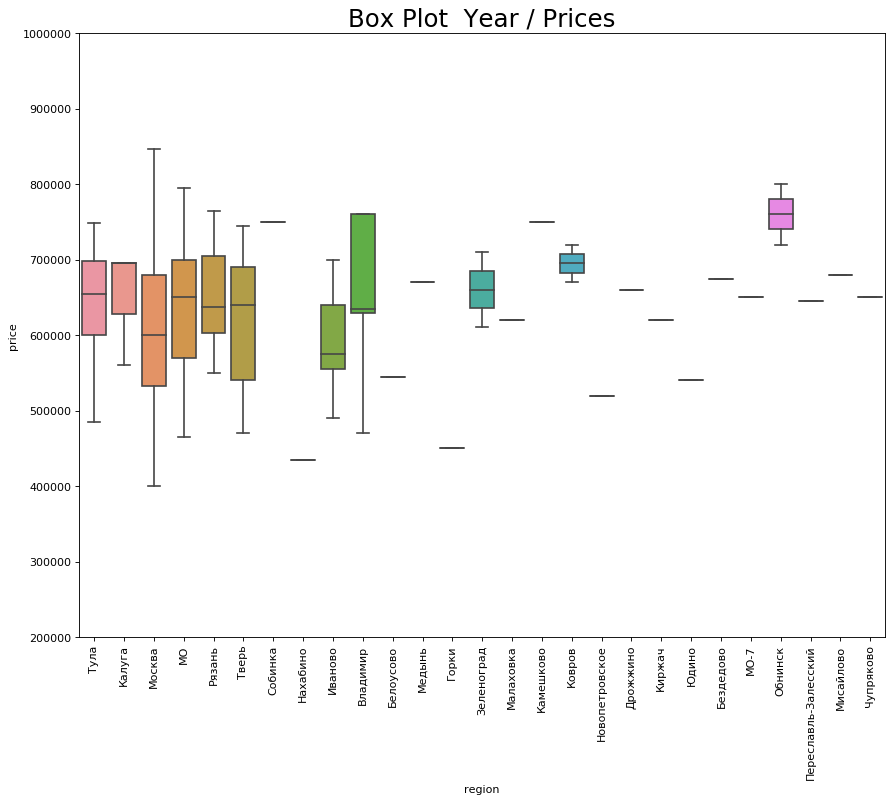

In [41]:
# Построим Box Plot цены по регионам для модели 'Kia Rio III Рестайлинг'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(200000, 1000000)
plt.show()

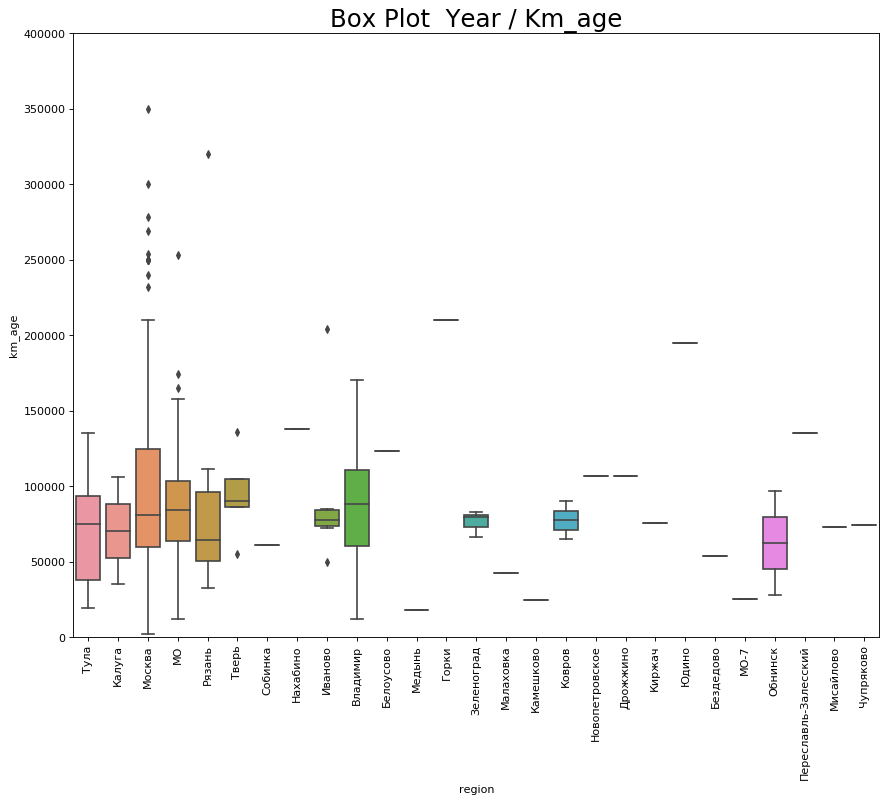

In [42]:
# Построим Box Plot пробегов по регионам для модели 'Kia Rio III Рестайлинг'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='km_age', data=auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III Рестайлинг'],group_col='year', y='km_age')  

# Decoration
plt.title('Box Plot  Year / Km_age', fontsize=22)
plt.ylim(0, 400000)
plt.show()

####### Цены на Kia Rio III Рестайлинг входят в межквартильный размах цен Москвы (Box Plot с самым большим размахом).
Медианные значения цен по регионам выше там, где меньше медианное значение пробега.
Можно сделать вывод, что цены по стране примерно одинаковые.

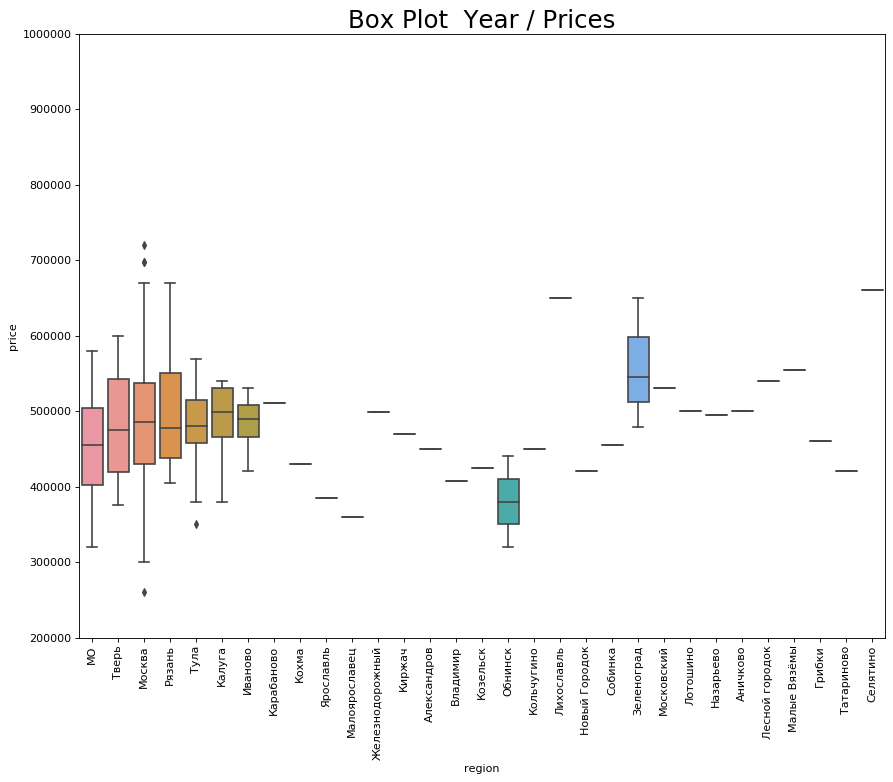

In [43]:
# Построим Box Plot цены по регионам для модели 'Kia Rio III'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio III'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(200000, 1000000)
plt.show()

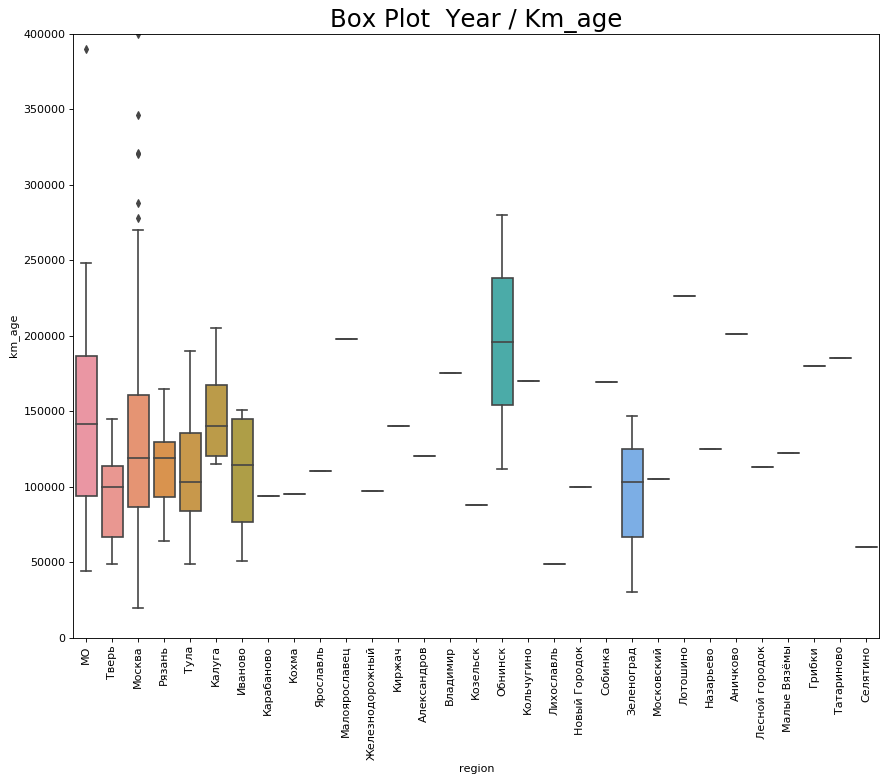

In [44]:
# Построим Box Plot пробегов по регионам для модели 'Kia Rio III'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='km_age', data=auto_data.loc[auto_data['model'] == 'Kia Rio III'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio III'],group_col='year', y='km_age')  

# Decoration
plt.title('Box Plot  Year / Km_age', fontsize=22)
plt.ylim(0, 400000)
plt.show()

####### Для Kia Rio III картина похожая. Медианные значения цен по регионам выше там, где меньше медианное значение пробега.

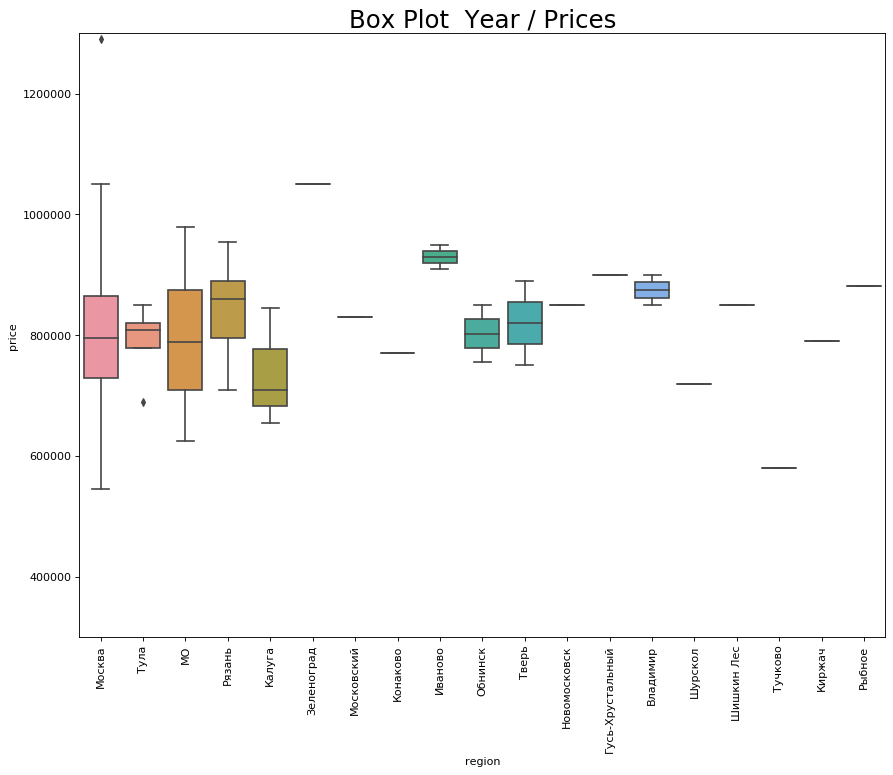

In [45]:
# Построим Box Plot цены по регионам для модели 'Kia Rio IV'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='price', data=auto_data.loc[auto_data['model'] == 'Kia Rio IV'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio IV'],group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(300000, 1300000)
plt.show()

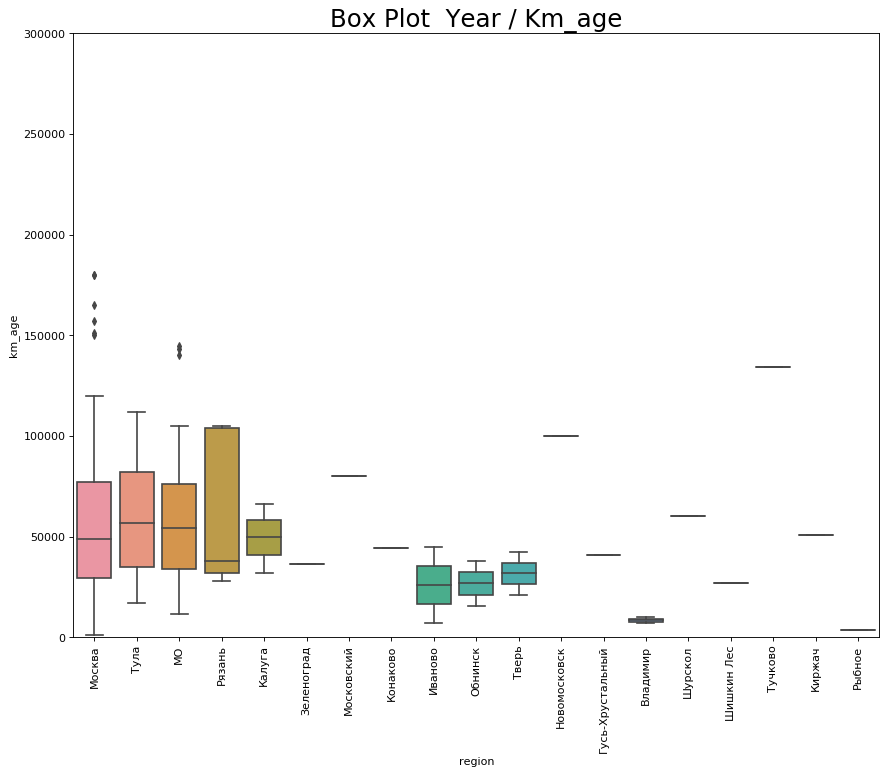

In [46]:
# Построим Box Plot пробегов по регионам для модели 'Kia Rio IV'

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='region', y='km_age', data=auto_data.loc[auto_data['model'] == 'Kia Rio IV'], notch=False)
plt.xticks(rotation=90)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(auto_data.loc[auto_data['model'] == 'Kia Rio IV'],group_col='year', y='km_age')  

# Decoration
plt.title('Box Plot  Year / Km_age', fontsize=22)
plt.ylim(0, 300000)
plt.show()

#### Для Kia Rio IV картина похожая

In [47]:
# Удалим столбец 'region'

auto_data.drop(['region'], axis='columns', inplace=True)

## Распределение целевого признака (цены)


 mu = 578168.89 and sigma = 207001.98



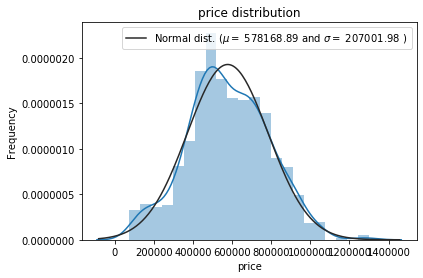

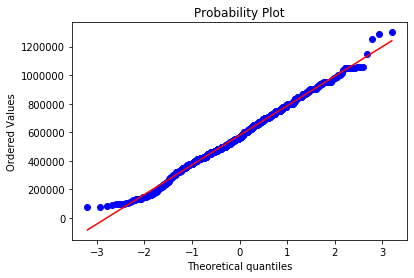

In [48]:
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [49]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.071111
Kurtosis: -0.083184


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [50]:
# Заменим значение 'газобаллонное оборудование' на 'ГБО'

auto_data['fuel_type'] = auto_data['fuel_type'].str.replace('газобаллонное оборудование','ГБО')

In [51]:
for i in auto_data['fuel_type'].unique():
    print(i)

 Бензин
 Бензин, ГБО


In [52]:
# Сгруппируем данные по модельному ряду и посмотрим среднюю цену

auto_data.groupby('model')['price'].mean()

model
Kia Rio I                 118928.428571
Kia Rio I Рестайлинг      168567.567568
Kia Rio II                278719.192308
Kia Rio II Рестайлинг     355235.135135
Kia Rio III               480540.362007
Kia Rio III Рестайлинг    611198.620130
Kia Rio IV                798281.362745
Kia Rio IV X-Line         924893.153846
Name: price, dtype: float64

In [53]:
# Для удобства создадим фрейм данных с именем df

df = auto_data

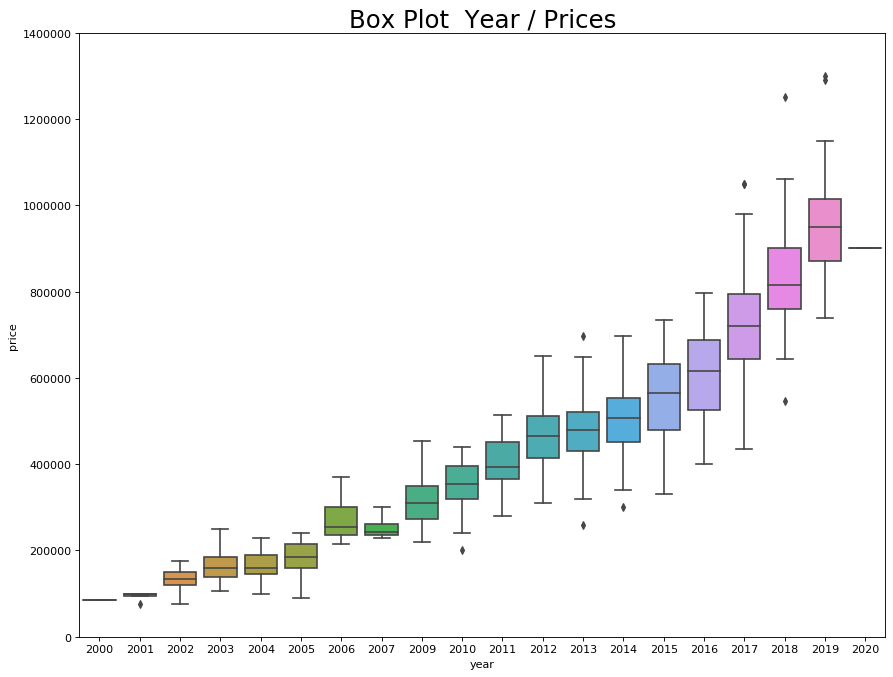

In [54]:
# Построим Box Plot цены по годам выпуска.

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

####### На графике присутствуют "выбросы" по цене. У дилера есть определенная линейка комплектаций, она укладывается в статистику. Если цена заметно выше, то велика вероятность, что владелец установил за дополнительную плату какое-нибудь дорогое дополнительное оборудование (диски/мультимедиа/камеры и т.п.). Такие "выбросы" лучше исключить. Если же цена очень низкая - скорее всего авто в не очень хорошем состоянии.
Пока не будем удалять выбросы, построим модель и посмотрим, какие будут результаты сначала с выбросами, а потом без них

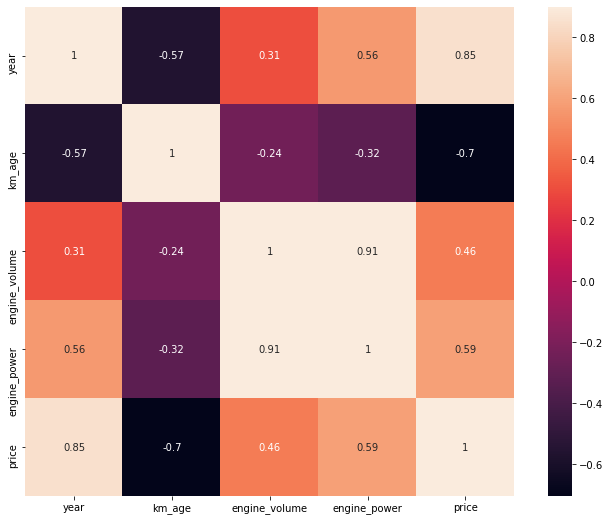

In [55]:
# посмотрим на матрицу корреляций

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

####### На матрице корреляций можно увидеть, что признаки 'engine_volume' и 'engine_power' сильно коррелируют между собой.
Действительно, между ними прямая взаимосвязь, чем больше объем двигателя, тем больше мощность.
Удалим 'engine_volume', т.к. при одинаковых объемах двигателя может быть различная мощность у разных поколений автомобилей

In [56]:
df.drop(['engine_volume'], axis='columns', inplace=True)

In [57]:
df.head()

,model,year,km_age,body_type,color,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,107,Бензин,механическая,2 владельца,Оригинал,410000


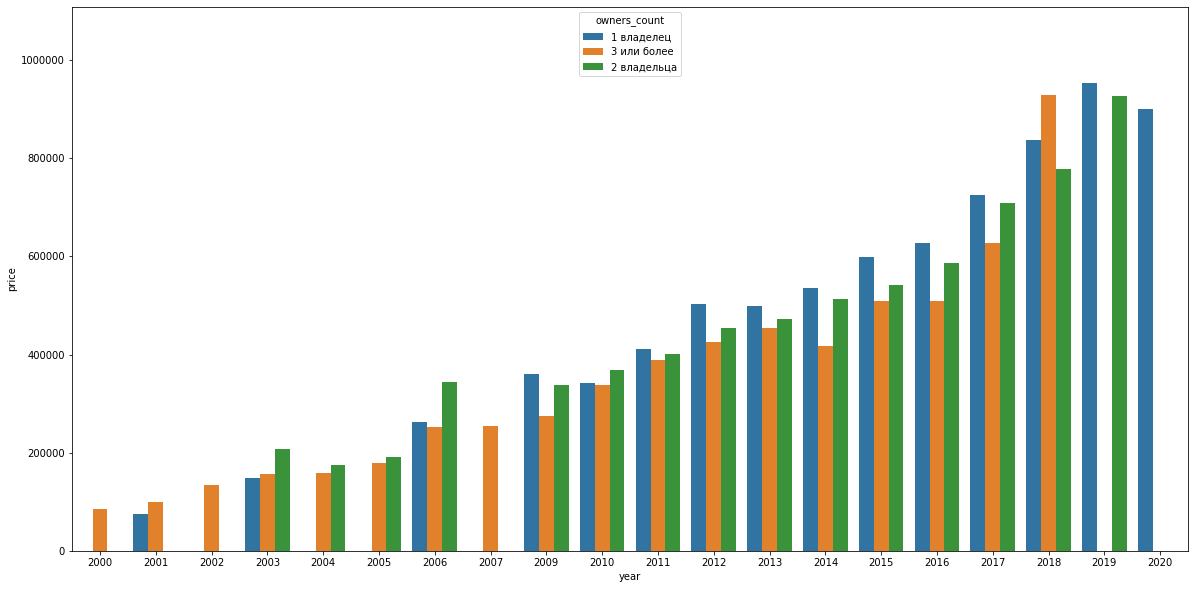

In [58]:
# Посмотрим на столбчатую диаграмму средней цены по годам в зависимости от количества владельцев

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='owners_count', errwidth=0, data=df)

####### В большинстве годов автомобили с одним владельцем стоят дороже, дешевле с двумя и еще дешевле с 3 и более. Это не очень старые автомобили, на которые есть хороший спрос.

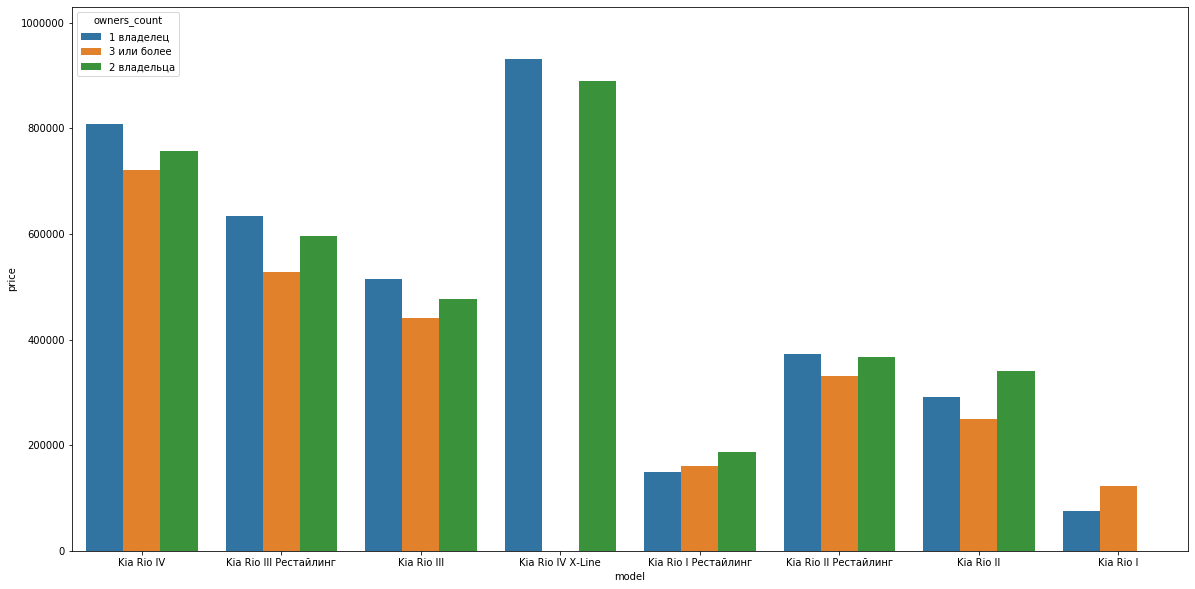

In [59]:
# Построим диаграмму цен в зависимости от количества владельцев по моделям

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='model', y='price', hue='owners_count', errwidth=0, data=df)

####### Такая же картина начиная со 2 поколения с рестайлингом.

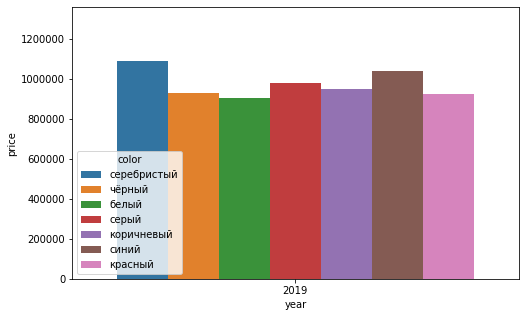

In [60]:
# Цена, в зависимости от цвета для 2019 года

plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

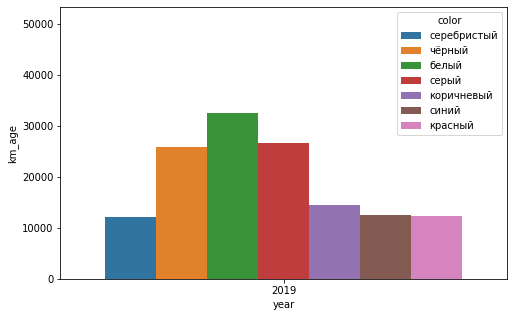

In [61]:
# Пробег овтомобилей различных цветов в 2019 году

plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

####### На двух последних столбчатых диаграммах мы показали автомобили 2019 года с разбивкой цены по цветам и пробега по цветам. Как видно из этих диаграмм, цвет не влияет на цену (или влияет очень несущественно при прочих равных условиях), например серебристые автомобили 2019 года имеют самую высокую среднюю цену, но при этом у них самый маленький средний пробег.
Белые автомобили (3-й столбец), напротив, имеют самую низкую цену, но самый высокий пробег, хотя белый цвет довольно популярный.

#### Проверим картину для 2018 года

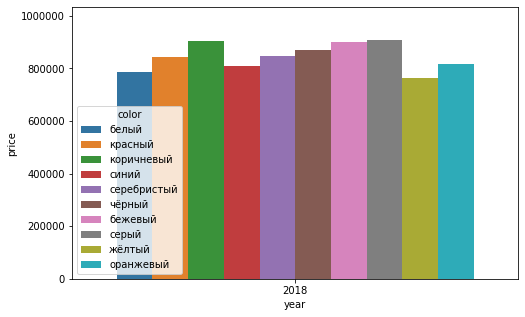

In [62]:
plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

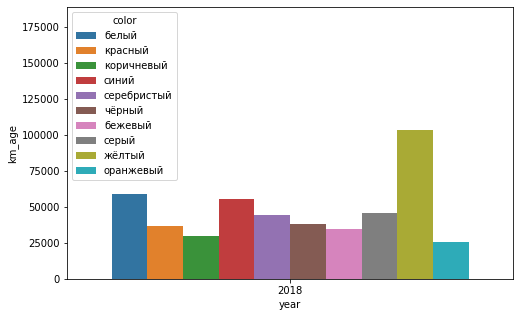

In [63]:
plt.rcParams['figure.figsize']=(8,5)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

###### Картина примерно такая же

In [64]:
# удалим столбец с цветом

df.drop(['color'], axis='columns', inplace=True)

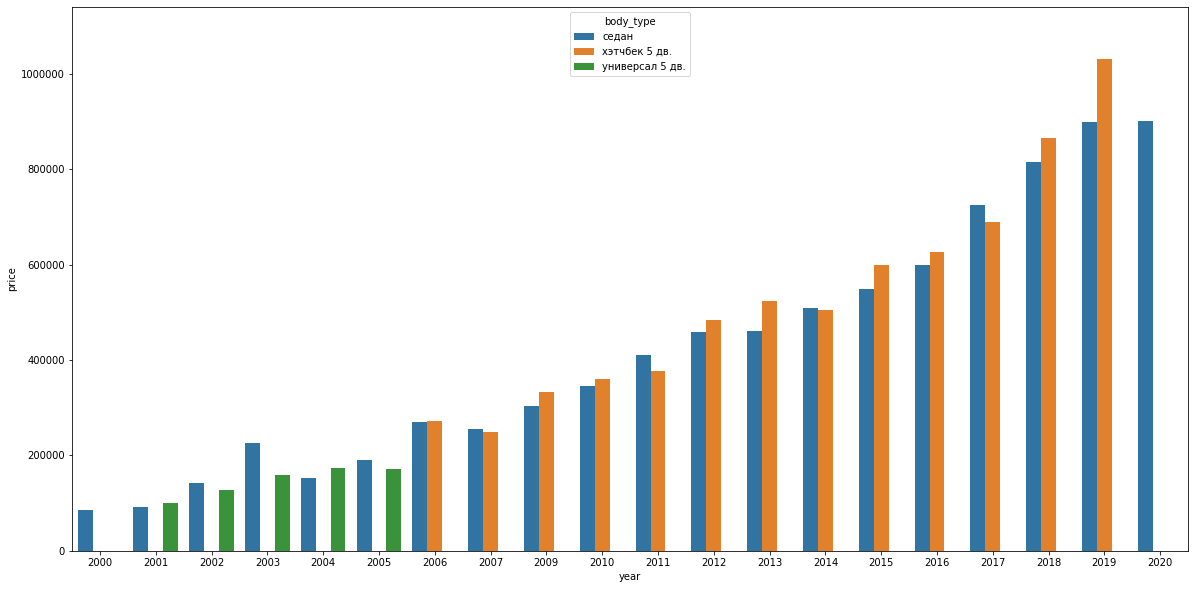

In [65]:
# Посмотрим на диаграммы цен по типу кузова по годам выпуска

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='body_type', errwidth=0, data=df)

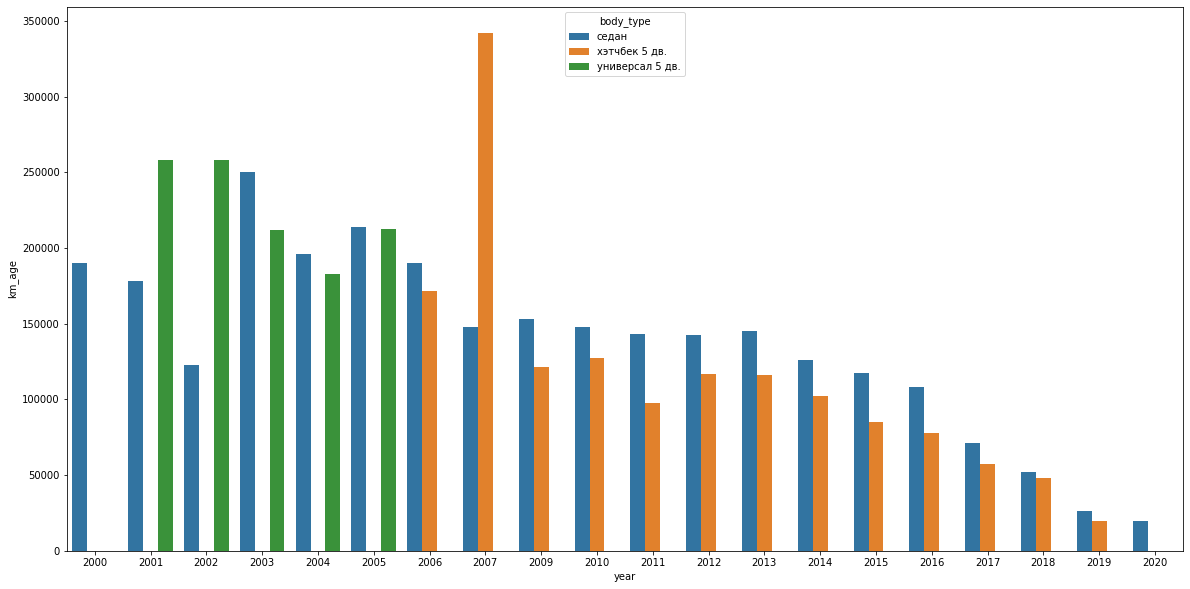

In [66]:
# Посмотрим на диаграммы пробегов по типу кузова по годам выпуска

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='body_type', errwidth=0, data=df)

####### В большинстве годов выпуска хэтчбеки стоили немного дороже седанов. Но у хэтчбеков был ниже пробег по годам.
Новые хэтчбеки в автосалонах стоят немного дороже седанов, поэтому оставим этот признак.

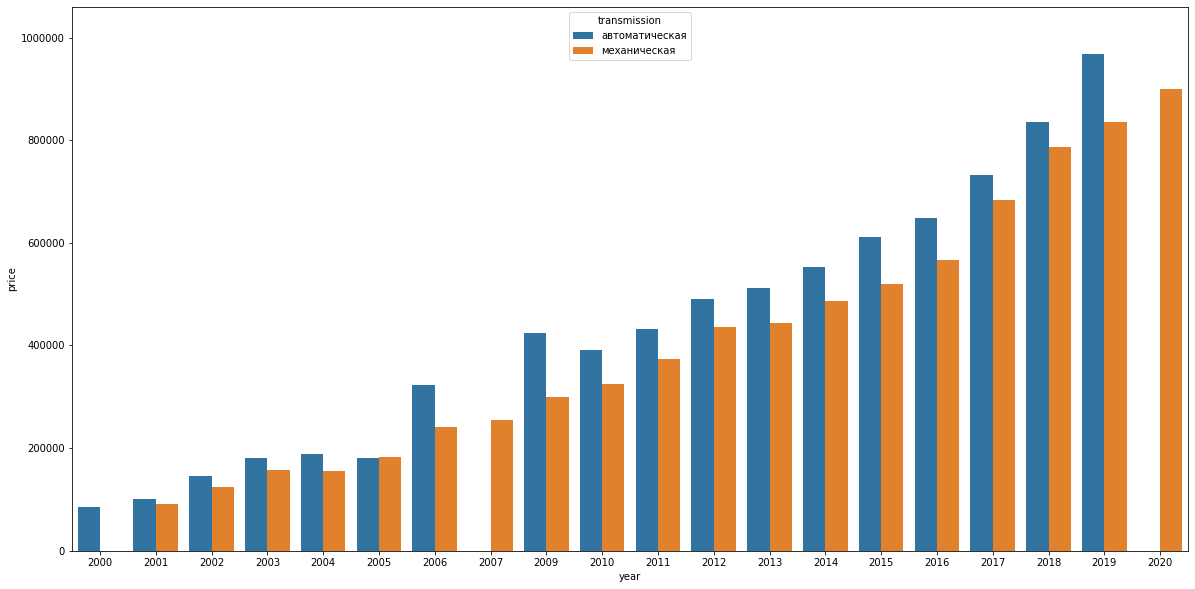

In [67]:
# Диаграмма цен по типу трансмиссии по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='transmission', errwidth=0, data=df)

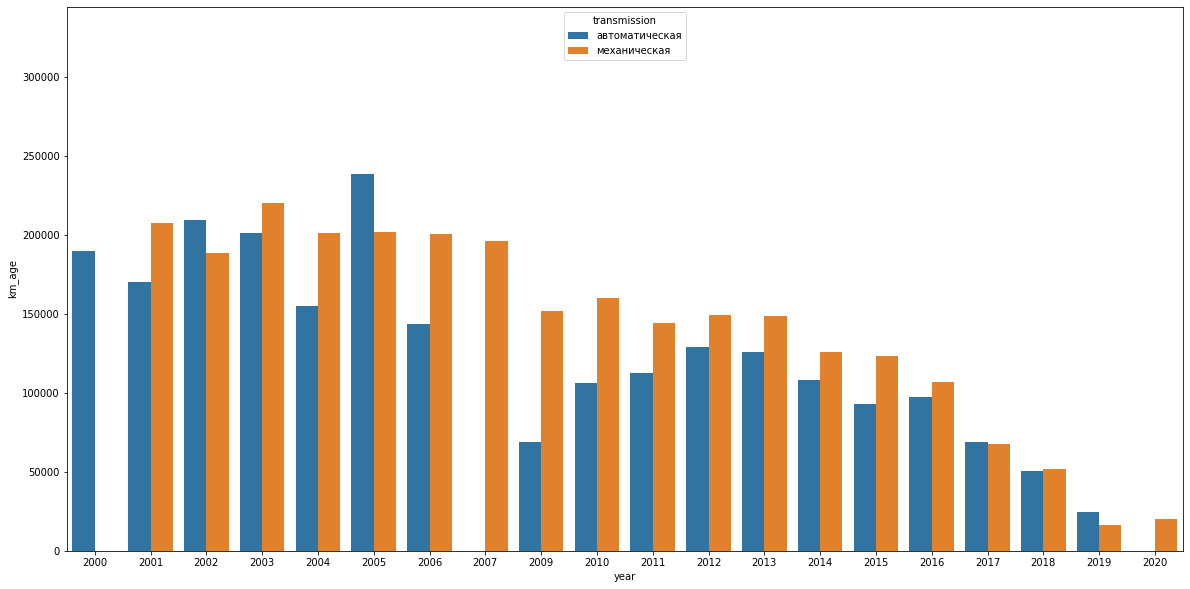

In [68]:
# Диаграмма пробегов по типу трансмиссии по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='transmission', errwidth=0, data=df)

####### Автомобили с автоматической трансмиссией стоят дороже, но средний пробег по годам больше на "механике". Новые автомобили на автомате стоят дороже, примем допущение, что и на подержанные распространяется такое явление.

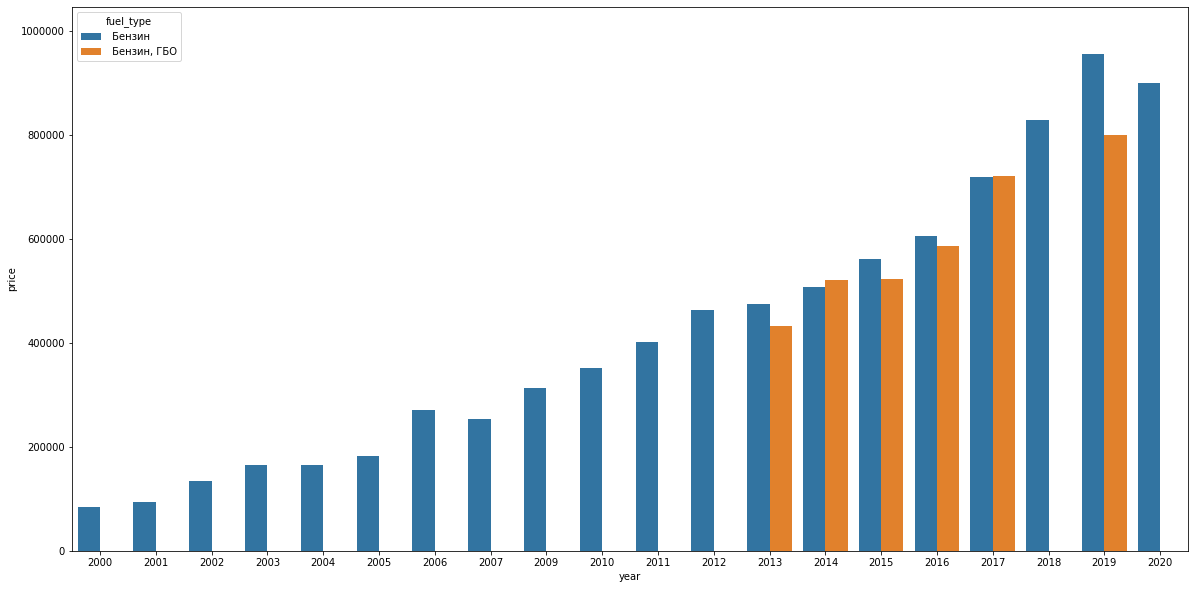

In [69]:
# Диаграмма цен по типу топлива по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='price', hue='fuel_type', errwidth=0, data=df)

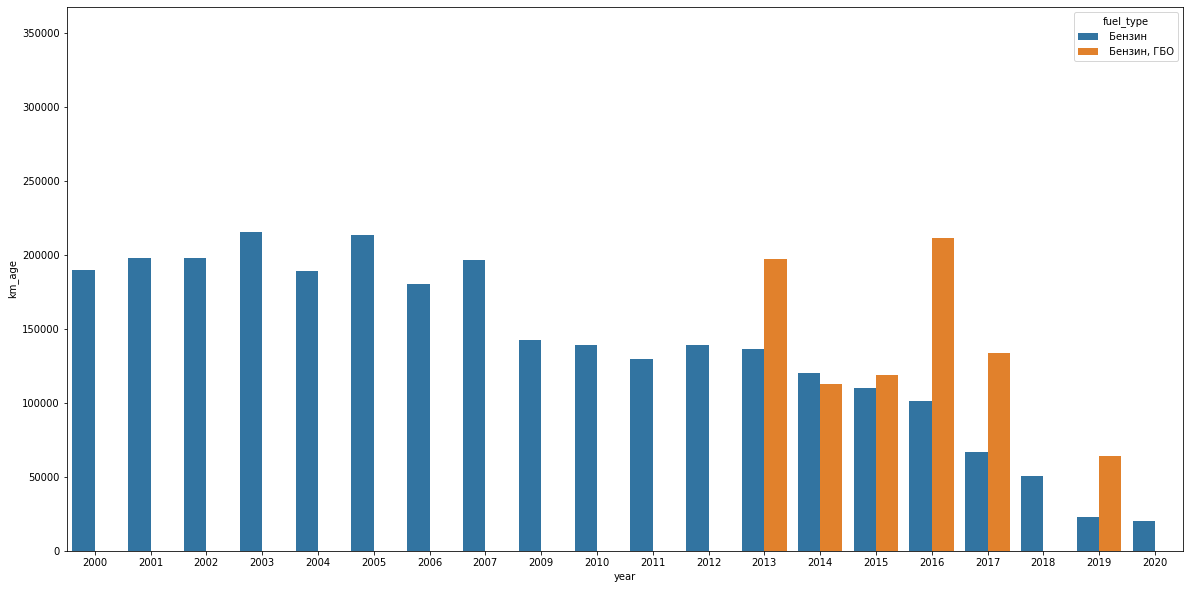

In [70]:
# Диаграмма пробегов по типу топлива по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='fuel_type', errwidth=0, data=df)

In [71]:
# Посмотрим количество автомобилей в группах с различными типами топлива

df.groupby('fuel_type').count()['model']

fuel_type
 Бензин         980
 Бензин, ГБО     14
Name: model, dtype: int64

####### Автомобилей, оснащенных ГБО, всего 14 в нашей выборке, 1.3%, это несущественно, тем более из двух последних графиков видно, что цена автомобилей с ГБО зависит от пробега.

In [72]:
# удалим этот столбец

df.drop(['fuel_type'], axis='columns', inplace=True)

In [73]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [74]:
df.groupby('passport').count()['model']

passport
Дубликат     66
Оригинал    928
Name: model, dtype: int64

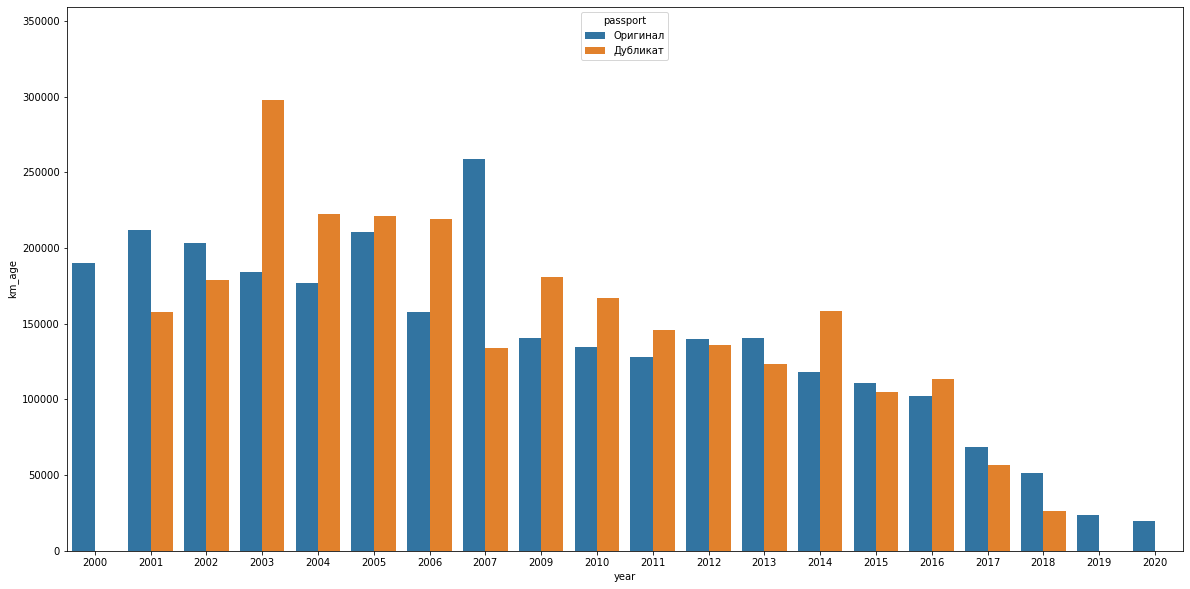

In [75]:
# Диаграмма пробегов с различными видами ПТС по годам

plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='year', y='km_age', hue='passport', errwidth=0, data=df)

####### Дубликат ПТС выдается, когда закончилось место в оригинале, либо при утере/порче. Место может закончиться, если много владельцев. В принципе, ничего криминального в дубликате ПТС нет. Тем более, нами было выяснено, что наличие этого признака ухудшает модель (возрастает RMSE).

In [76]:
# Удалим колонку 'passport'

df.drop(['passport'], axis='columns', inplace=True)

In [77]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000


In [78]:
# Итоговые признаки для дальнейшей работы

print(df.columns.tolist())

['model', 'year', 'km_age', 'body_type', 'engine_power', 'transmission', 'owners_count', 'price']


In [79]:
# создадим фрейм под именем auto_ru_set

auto_ru_set = df

## Обработаем данные с сайта drom.ru

#### Код парсера https://github.com/FelixMusic/myprojects/blob/master/DromRU_parser.py
##### Будем извлекать только те данные, которые были оставлены выше

In [81]:
# Загрузим данные из файла .xls

# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

In [82]:
# Назначим имена колонок

auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'price', 'link']

In [83]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [84]:
auto_data.shape

(2000, 8)

In [85]:
auto_data.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,"2 поколение, рестайлинг",2011,125589,седан,95,автомат,1 запись,364000
1,3 поколение,2012,149829,хэтчбек 5 дв.,107,механика,3 записи,375000
2,3 поколение,2014,114900,седан,123,автомат,None,627000
3,"3 поколение, рестайлинг",2016,70000,хэтчбек 5 дв.,107,автомат,2 записи,597000
4,4 поколение,2020,Пробег не указан,седан,123,автомат,None,939900


In [86]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [87]:
# Оставим только те строки, где указан пробег

auto_data = auto_data.loc[auto_data['km_age'] != 'Пробег не указан']

In [88]:
auto_data.shape

(1236, 8)

In [89]:
# Посмотрим на уникальные значения некоторых колонок

columns = [ 'model', 'body_type', 'engine_power', 'transmission','owners_count']

for i in columns:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 7
2 поколение, рестайлинг
3 поколение
3 поколение, рестайлинг
4 поколение
1 поколение, рестайлинг
2 поколение
1 поколение

   body_type: 3
седан
хэтчбек 5 дв.
универсал

   engine_power: 7
95
107
123
97
100
96
84

   transmission: 2
автомат
механика

   owners_count: 11
1 запись
3 записи
2 записи
5 записей
4 записи
6 записей
8 записей
7 записей
9 записей
11 записей
10 записей



In [90]:
# Заменим названия модификаций, чтобы они были как в датафрейме с auto.ru

auto_data['model'] = auto_data['model'].str.replace("1 поколение",'Kia Rio I')
auto_data['model'] = auto_data['model'].str.replace("1 поколение, рестайлинг",'Kia Rio I Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("2 поколение",'Kia Rio II')
auto_data['model'] = auto_data['model'].str.replace("2 поколение, рестайлинг",'Kia Rio II Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("3 поколение",'Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace("3 поколение, рестайлинг",'Kia Rio III Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("4 поколение",'Kia Rio IV')

In [91]:
# Посмотрим результат

for i in auto_data['model'].unique():
    print(i)

Kia Rio II, рестайлинг
Kia Rio III
Kia Rio III, рестайлинг
Kia Rio IV
Kia Rio I, рестайлинг
Kia Rio II
Kia Rio I


In [92]:
# появилась лишняя запятая в названиях, возможно какой-то баг, удалим ее
# Также пропишем слово 'рестайлинг' с заглавной буквы

auto_data['model'] = auto_data['model'].str.replace(",",'')

auto_data['model'] = auto_data['model'].str.replace("рестайлинг",'Рестайлинг')

In [93]:
# Посмотрим результат

for i in auto_data['model'].unique():
    print(i)

Kia Rio II Рестайлинг
Kia Rio III
Kia Rio III Рестайлинг
Kia Rio IV
Kia Rio I Рестайлинг
Kia Rio II
Kia Rio I


In [94]:
# Заменим значения типов трансмиссии, как в данных с auto.ru

auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [95]:
# Заменим значения типа кузова, как в данных с auto.ru

auto_data['body_type'] = auto_data['body_type'].str.replace('универсал','универсал 5 дв.')

In [96]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [97]:
# В дата-сете отсутствуют модели X-Line

auto_data.loc[(auto_data['model'] == 'Kia Rio IV') & (auto_data['body_type'] == 'хэтчбек 5 дв.')]

,model,year,km_age,body_type,engine_power,transmission,owners_count,price


In [98]:
# Поменяем записи по количеству владельцев

auto_data['owners_count'] = auto_data['owners_count'].str.replace('1 запись','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2 записи','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('5 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('6 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('7 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('8 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('9 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('10 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('11 записей','3 или более')

In [99]:
# проверим

auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [100]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [101]:
# удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

### Распределение целевого признака (цены)


 mu = 579330.09 and sigma = 182006.35



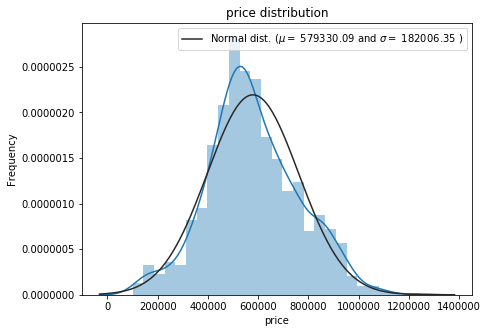

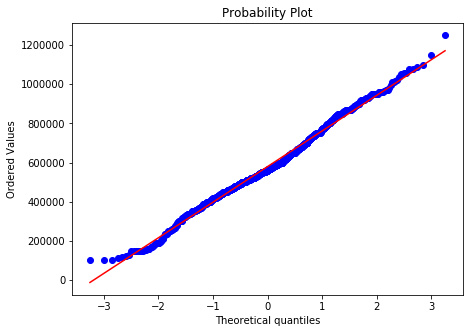

In [102]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [103]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.191390
Kurtosis: 0.096398


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [104]:
# Для удобства создадим фрейм данных с именем df

df = auto_data

In [105]:
df.shape

(1233, 8)

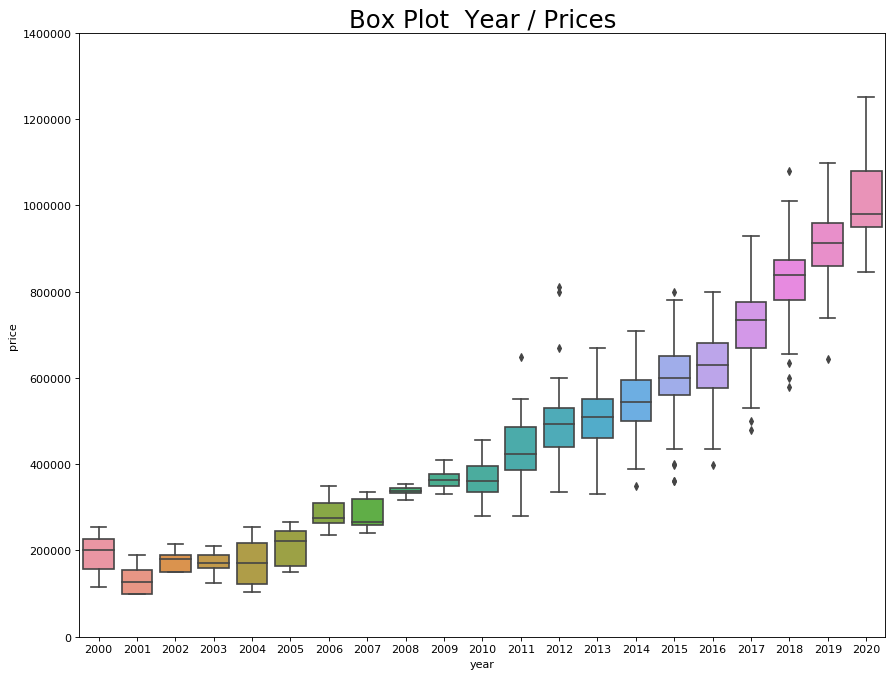

In [106]:
# Построим Box Plot цены по годам

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

##### Как и в первом случае, выбросы пока удалять не будем

In [107]:
# создадим фрейм под именем drom_ru_set

drom_ru_set = df

## Обработаем данные с сайта с avito.ru

#### Код парсера https://github.com/FelixMusic/myprojects/blob/master/Avito_AUTO_parser.py

In [108]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

In [109]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'condition', 'price', 'link' ]

In [110]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [111]:
auto_data.shape

(4707, 9)

In [112]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [113]:
auto_data.shape

(4328, 9)

In [114]:
# Посмотрим уникальные значения некоторых столбцов

for i in [ 'model', 'body_type', 'engine_power', 'transmission','owners_count', 'condition']:
    print('   ', i, ': ', len(auto_data[i].unique()), sep='')
    for j in auto_data[i].unique():
        print(j)
    print()

   model: 8
II рестайлинг
II
III
IV
III рестайлинг
I рестайлинг
I
IV рестайлинг

   body_type: 2
седан
хетчбэк

   engine_power: 13
97
123
107
100
95
98
108
75
105
84
109
112
82

   transmission: 2
автомат
механика

   owners_count: 4
3
2
4+
1

   condition: 2
не битый
битый



In [115]:
# Заменим значение типа трансмиссии

auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [116]:
# В данных присутствуют "битые" автомобили

auto_data.groupby('condition').count()['model']

condition
битый        108
не битый    4220
Name: model, dtype: int64

In [117]:
# итого 108 битых автомобилей. Исключим их

auto_data = auto_data.loc[auto_data['condition'] != 'битый']

In [118]:
# Теперь можно удалить столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [119]:
# Переименум названия моделей

auto_data['model'] = 'Kia Rio ' + auto_data['model']

In [120]:
auto_data['model'] = auto_data['model'].str.replace('рестайлинг','Рестайлинг')

In [121]:
for i in auto_data['model'].unique():
    print(i)

Kia Rio II Рестайлинг
Kia Rio II
Kia Rio III
Kia Rio IV
Kia Rio III Рестайлинг
Kia Rio I Рестайлинг
Kia Rio I
Kia Rio IV Рестайлинг


In [122]:
# Переименуем значения в столбце 'owners_count'

auto_data['owners_count'] = auto_data['owners_count'].str.replace('3','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('1','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4+','3 или более')

In [123]:
for i in auto_data['owners_count'].unique():
    print(i)

3 или более
2 владельца
3 или более+
1 владелец


In [124]:
# В значении '3 или более+' уберем '+'

auto_data['owners_count'] = auto_data['owners_count'].str.replace('+','')

In [125]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '1 владелец'], dtype=object)

In [126]:
# Переименуем 'хетчбэк' на 'хэтчбек 5 дв.'

auto_data['body_type'] = auto_data['body_type'].str.replace('хетчбэк','хэтчбек 5 дв.')

In [127]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.'], dtype=object)

In [128]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [129]:
auto_data.shape

(4220, 8)

In [130]:
# удалим дубликаты строк

auto_data = auto_data.drop_duplicates()

In [131]:
# удалим новые автомобили (с очень маленьким пробегом) - предложения от дилеров

auto_data = auto_data.loc[auto_data['km_age'] > 150]

In [132]:
auto_data.shape

(4024, 8)

### Распределение целевого признака (цены)


 mu = 568955.81 and sigma = 196367.20



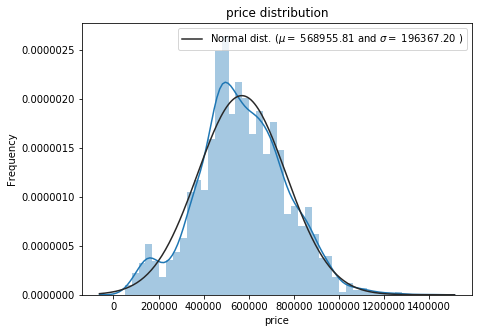

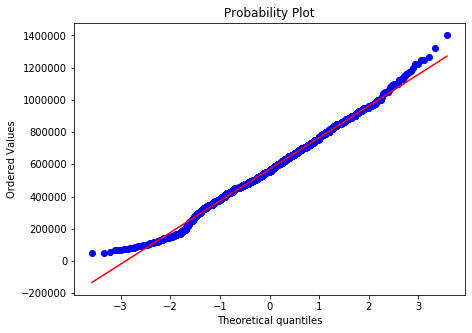

In [133]:
plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

In [134]:
# Ассиметрия и эксцесс:

print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.073959
Kurtosis: 0.162472


#### Из графиков видно, что распределение цены близко к нормальному, условие гомоскедастичности соблюдается

In [135]:
# Также создадим фрейм df для удобства

df = auto_data

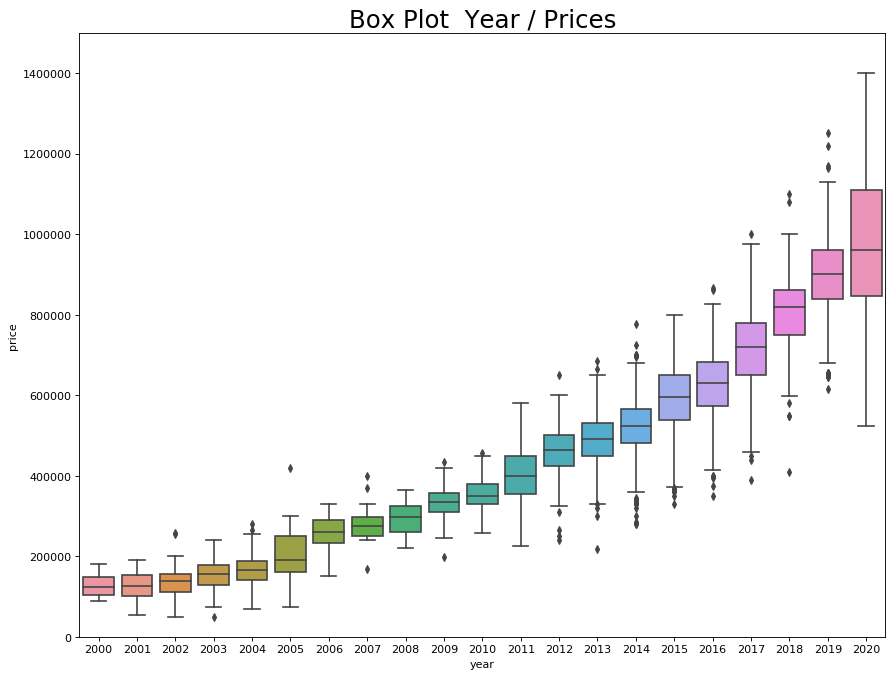

In [136]:
# Постоим Box Plot цены по годам

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

#### Выбросы пока не удаляем

In [137]:
# создадим фрейм под именем avito_ru_set

avito_ru_set = df

### Итого, мы имеем три набора данных с разных сайтов

In [138]:
auto_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000


In [139]:
drom_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2011,125589,седан,95,автоматическая,1 владелец,364000
1,Kia Rio III,2012,149829,хэтчбек 5 дв.,107,механическая,3 или более,375000
3,Kia Rio III Рестайлинг,2016,70000,хэтчбек 5 дв.,107,автоматическая,2 владельца,597000
8,Kia Rio III Рестайлинг,2016,101000,седан,107,автоматическая,1 владелец,640000
10,Kia Rio IV,2017,63000,седан,123,механическая,1 владелец,759000


In [140]:
avito_ru_set.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio II Рестайлинг,2009,169700,седан,97,автоматическая,3 или более,340000
1,Kia Rio II,2007,290000,седан,97,автоматическая,2 владельца,290000
2,Kia Rio III,2011,132000,седан,123,автоматическая,3 или более,485000
3,Kia Rio III,2012,93000,хэтчбек 5 дв.,123,механическая,1 владелец,450000
4,Kia Rio III,2012,150000,седан,107,механическая,3 или более,429000


### Объединим все три набора в один

In [141]:
new_df = pd.concat([auto_ru_set, drom_ru_set, avito_ru_set], ignore_index=True)

In [142]:
new_df.shape

(6251, 8)

In [143]:
# удалим дубликаты, на разных сайтах объявления могут совпадать

new_df = new_df.drop_duplicates()

In [144]:
new_df.shape

(6012, 8)

#### Итак, мы получили один итоговый набор данных, соединив три фрейма с разных площадок

In [145]:
df = new_df


 mu = 568955.81 and sigma = 196367.20



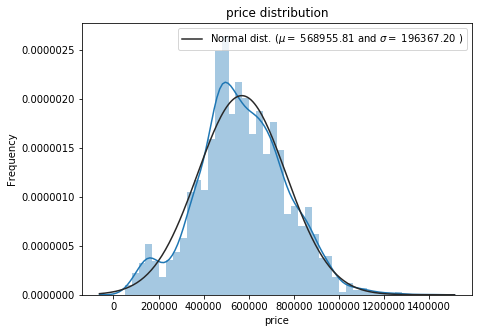

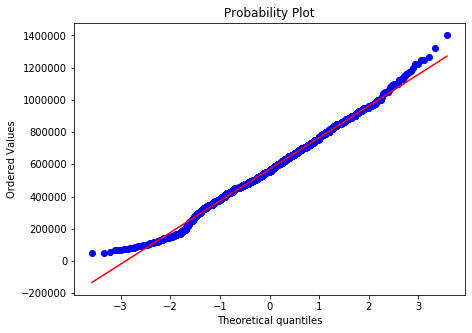

In [146]:
# Посмотрим, как распределена цена

plt.rcParams['figure.figsize']=(7,5)
sns.distplot(auto_data['price'] , fit=norm)

# Получим параметры, используемые функцией
(mu, sigma) = norm.fit(auto_data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Строим график распределения
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('price distribution')

# Строим QQ-plot
fig = plt.figure()
res = stats.probplot(auto_data['price'], plot=plt)
plt.show()

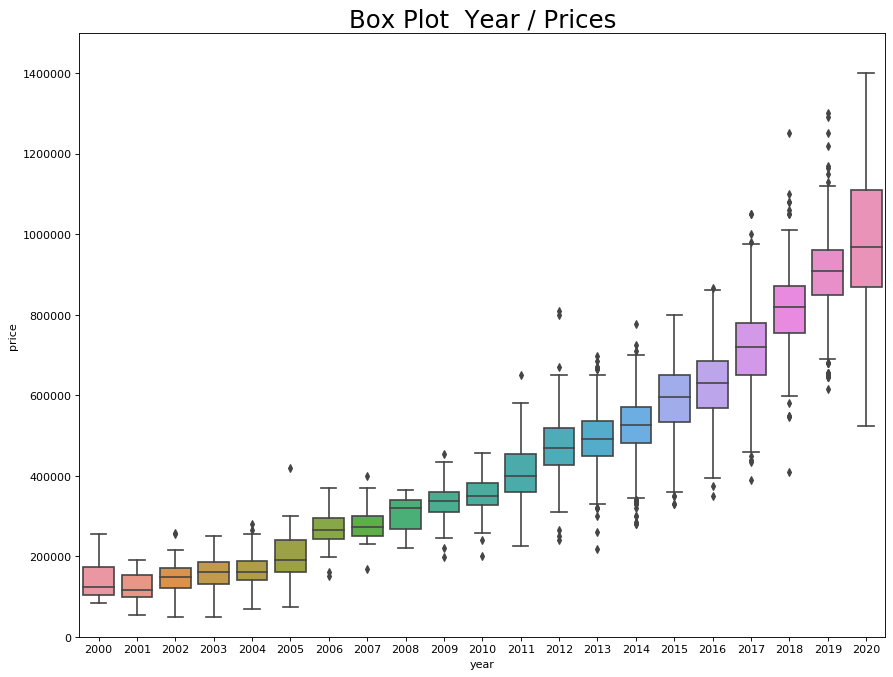

In [147]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

# Алгоритм CatBoost

#### Назначаем X и y

In [148]:
X = df.drop(['price'], axis=1)
y = df['price']

#### Подберем гиперпараметры регрессора, используя кроссвалидацию
#### Разобъем данные на тренировочные и тестовые, test_size=0.25

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3, 4, 5, 6],
              'learning_rate' : [0.01, 0.03, 0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.2, 0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 4, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 192273.7234715	total: 49.2ms	remaining: 39.3s
1:	learn: 187766.5407100	total: 54.5ms	remaining: 21.8s
2:	learn: 183291.8818347	total: 59.1ms	remaining: 15.7s
3:	learn: 179217.9024269	total: 64.7ms	remaining: 12.9s
4:	learn: 175071.7371806	total: 71.9ms	remaining: 11.4s
5:	learn: 171003.3938531	total: 77.7ms	remaining: 10.3s
6:	learn: 167043.9832554	total: 83.1ms	remaining: 9.42s
7:	learn: 163269.2448986	total: 87.2ms	remaining: 8.63s
8:	learn: 159496.4048412	total: 91.3ms	remaining: 8.03s
9:	learn: 155925.0694200	total: 95.7ms	remaining: 7.56s
10:	learn: 152501.5076972	total: 101ms	remaining: 7.21s
11:	learn: 149312.8233153	total: 106ms	remaining: 6.95s
12:	learn: 146143.8713083	total: 110ms	remaining: 6.65s
13:	learn: 143094.2155993	total: 116ms	remaining: 6.51s
14:	learn: 140104.5818820	total: 122ms	remaining: 6.4s
15:	learn: 137085.6676198	total: 126ms	remaining: 6.18s
16:	learn: 134287.6124145	total: 130ms	remaining: 6s
17:	learn: 131607.1742108	total: 134ms	remaining: 5.

171:	learn: 55444.2673474	total: 726ms	remaining: 2.65s
172:	learn: 55412.1247412	total: 730ms	remaining: 2.65s
173:	learn: 55387.9075445	total: 734ms	remaining: 2.64s
174:	learn: 55371.7440179	total: 737ms	remaining: 2.63s
175:	learn: 55340.8644671	total: 740ms	remaining: 2.62s
176:	learn: 55324.3301584	total: 744ms	remaining: 2.62s
177:	learn: 55297.4827353	total: 748ms	remaining: 2.61s
178:	learn: 55274.0089981	total: 752ms	remaining: 2.61s
179:	learn: 55235.3545302	total: 756ms	remaining: 2.6s
180:	learn: 55224.3811843	total: 758ms	remaining: 2.59s
181:	learn: 55192.4136407	total: 761ms	remaining: 2.58s
182:	learn: 55169.0206682	total: 765ms	remaining: 2.58s
183:	learn: 55135.3564378	total: 768ms	remaining: 2.57s
184:	learn: 55109.0436370	total: 772ms	remaining: 2.57s
185:	learn: 55101.6474838	total: 775ms	remaining: 2.56s
186:	learn: 55080.5501444	total: 778ms	remaining: 2.55s
187:	learn: 55063.3631868	total: 781ms	remaining: 2.54s
188:	learn: 55049.5377324	total: 786ms	remaining:

358:	learn: 53149.2868191	total: 1.4s	remaining: 1.72s
359:	learn: 53139.8373882	total: 1.4s	remaining: 1.71s
360:	learn: 53128.6546639	total: 1.41s	remaining: 1.71s
361:	learn: 53114.4923479	total: 1.41s	remaining: 1.71s
362:	learn: 53109.1599410	total: 1.41s	remaining: 1.7s
363:	learn: 53100.3394112	total: 1.42s	remaining: 1.7s
364:	learn: 53096.9796299	total: 1.42s	remaining: 1.7s
365:	learn: 53092.3860198	total: 1.43s	remaining: 1.69s
366:	learn: 53083.6052176	total: 1.43s	remaining: 1.69s
367:	learn: 53075.5902695	total: 1.43s	remaining: 1.68s
368:	learn: 53065.9353637	total: 1.44s	remaining: 1.68s
369:	learn: 53053.9251977	total: 1.44s	remaining: 1.67s
370:	learn: 53040.7282242	total: 1.44s	remaining: 1.67s
371:	learn: 53031.4048233	total: 1.45s	remaining: 1.67s
372:	learn: 53023.2921930	total: 1.45s	remaining: 1.66s
373:	learn: 53007.0699593	total: 1.46s	remaining: 1.66s
374:	learn: 53003.8806953	total: 1.46s	remaining: 1.65s
375:	learn: 52998.3000199	total: 1.47s	remaining: 1.6

531:	learn: 52097.9297978	total: 2.08s	remaining: 1.05s
532:	learn: 52097.4800969	total: 2.08s	remaining: 1.04s
533:	learn: 52094.4660080	total: 2.08s	remaining: 1.04s
534:	learn: 52084.6838441	total: 2.09s	remaining: 1.03s
535:	learn: 52082.3318710	total: 2.09s	remaining: 1.03s
536:	learn: 52078.5770803	total: 2.1s	remaining: 1.03s
537:	learn: 52071.3110313	total: 2.1s	remaining: 1.02s
538:	learn: 52069.9671030	total: 2.1s	remaining: 1.02s
539:	learn: 52066.3374107	total: 2.11s	remaining: 1.01s
540:	learn: 52061.8958556	total: 2.11s	remaining: 1.01s
541:	learn: 52061.7765767	total: 2.12s	remaining: 1.01s
542:	learn: 52055.1569064	total: 2.12s	remaining: 1s
543:	learn: 52047.8537940	total: 2.13s	remaining: 1s
544:	learn: 52041.2606718	total: 2.13s	remaining: 997ms
545:	learn: 52036.2366007	total: 2.13s	remaining: 993ms
546:	learn: 52033.7988576	total: 2.14s	remaining: 988ms
547:	learn: 52025.4426341	total: 2.14s	remaining: 984ms
548:	learn: 52019.5623473	total: 2.14s	remaining: 980ms
5

704:	learn: 51322.3713569	total: 2.75s	remaining: 370ms
705:	learn: 51318.8882434	total: 2.75s	remaining: 366ms
706:	learn: 51316.5108803	total: 2.75s	remaining: 362ms
707:	learn: 51314.5467463	total: 2.76s	remaining: 359ms
708:	learn: 51313.3642189	total: 2.76s	remaining: 355ms
709:	learn: 51308.7113121	total: 2.77s	remaining: 351ms
710:	learn: 51305.3550722	total: 2.77s	remaining: 347ms
711:	learn: 51304.7272276	total: 2.78s	remaining: 343ms
712:	learn: 51300.7851849	total: 2.78s	remaining: 339ms
713:	learn: 51296.7201125	total: 2.78s	remaining: 335ms
714:	learn: 51295.7055997	total: 2.79s	remaining: 331ms
715:	learn: 51293.8939337	total: 2.79s	remaining: 327ms
716:	learn: 51284.7756797	total: 2.79s	remaining: 323ms
717:	learn: 51283.1918681	total: 2.8s	remaining: 319ms
718:	learn: 51280.5769034	total: 2.8s	remaining: 315ms
719:	learn: 51277.7501128	total: 2.8s	remaining: 312ms
720:	learn: 51275.8199949	total: 2.81s	remaining: 308ms
721:	learn: 51275.4378069	total: 2.81s	remaining: 3

In [150]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=5)

In [151]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 192273.7234715	total: 8.52ms	remaining: 6.81s
1:	learn: 187766.5407100	total: 14.7ms	remaining: 5.86s
2:	learn: 183291.8818347	total: 20ms	remaining: 5.3s
3:	learn: 179217.9024269	total: 25.9ms	remaining: 5.16s
4:	learn: 175071.7371806	total: 32.7ms	remaining: 5.21s
5:	learn: 171003.3938531	total: 38.5ms	remaining: 5.1s
6:	learn: 167043.9832554	total: 44.2ms	remaining: 5s
7:	learn: 163269.2448986	total: 48.6ms	remaining: 4.81s
8:	learn: 159496.4048412	total: 54.6ms	remaining: 4.8s
9:	learn: 155925.0694200	total: 61.9ms	remaining: 4.89s
10:	learn: 152501.5076972	total: 76.5ms	remaining: 5.49s
11:	learn: 149312.8233153	total: 82.1ms	remaining: 5.39s
12:	learn: 146143.8713083	total: 86.5ms	remaining: 5.24s
13:	learn: 143094.2155993	total: 92.7ms	remaining: 5.2s
14:	learn: 140104.5818820	total: 100ms	remaining: 5.23s
15:	learn: 137085.6676198	total: 109ms	remaining: 5.34s
16:	learn: 134287.6124145	total: 118ms	remaining: 5.42s
17:	learn: 131607.1742108	total: 126ms	remaining: 5.4

169:	learn: 55502.5501271	total: 870ms	remaining: 3.22s
170:	learn: 55478.1815522	total: 876ms	remaining: 3.22s
171:	learn: 55444.2673474	total: 880ms	remaining: 3.21s
172:	learn: 55412.1247412	total: 884ms	remaining: 3.2s
173:	learn: 55387.9075445	total: 887ms	remaining: 3.19s
174:	learn: 55371.7440179	total: 891ms	remaining: 3.18s
175:	learn: 55340.8644671	total: 894ms	remaining: 3.17s
176:	learn: 55324.3301584	total: 900ms	remaining: 3.17s
177:	learn: 55297.4827353	total: 904ms	remaining: 3.16s
178:	learn: 55274.0089981	total: 909ms	remaining: 3.15s
179:	learn: 55235.3545302	total: 915ms	remaining: 3.15s
180:	learn: 55224.3811843	total: 917ms	remaining: 3.13s
181:	learn: 55192.4136407	total: 920ms	remaining: 3.13s
182:	learn: 55169.0206682	total: 925ms	remaining: 3.12s
183:	learn: 55135.3564378	total: 928ms	remaining: 3.11s
184:	learn: 55109.0436370	total: 933ms	remaining: 3.1s
185:	learn: 55101.6474838	total: 935ms	remaining: 3.09s
186:	learn: 55080.5501444	total: 939ms	remaining: 

332:	learn: 53395.1589872	total: 1.54s	remaining: 2.16s
333:	learn: 53376.9372086	total: 1.55s	remaining: 2.16s
334:	learn: 53365.5686868	total: 1.55s	remaining: 2.15s
335:	learn: 53352.5351592	total: 1.55s	remaining: 2.15s
336:	learn: 53341.4142008	total: 1.56s	remaining: 2.14s
337:	learn: 53331.3077578	total: 1.57s	remaining: 2.14s
338:	learn: 53319.8767265	total: 1.57s	remaining: 2.14s
339:	learn: 53313.0187758	total: 1.58s	remaining: 2.13s
340:	learn: 53301.0231846	total: 1.58s	remaining: 2.13s
341:	learn: 53286.7410207	total: 1.58s	remaining: 2.12s
342:	learn: 53273.5478954	total: 1.59s	remaining: 2.12s
343:	learn: 53266.3279227	total: 1.59s	remaining: 2.11s
344:	learn: 53260.9354694	total: 1.6s	remaining: 2.11s
345:	learn: 53255.0638013	total: 1.6s	remaining: 2.1s
346:	learn: 53249.4923033	total: 1.61s	remaining: 2.1s
347:	learn: 53239.2326238	total: 1.61s	remaining: 2.09s
348:	learn: 53235.5543571	total: 1.61s	remaining: 2.09s
349:	learn: 53230.4133608	total: 1.62s	remaining: 2.

489:	learn: 52296.3736301	total: 2.22s	remaining: 1.41s
490:	learn: 52289.7273060	total: 2.23s	remaining: 1.4s
491:	learn: 52284.0221097	total: 2.23s	remaining: 1.4s
492:	learn: 52279.5755922	total: 2.24s	remaining: 1.39s
493:	learn: 52269.8528677	total: 2.24s	remaining: 1.39s
494:	learn: 52267.5054988	total: 2.25s	remaining: 1.39s
495:	learn: 52257.6019553	total: 2.25s	remaining: 1.38s
496:	learn: 52254.7228528	total: 2.26s	remaining: 1.38s
497:	learn: 52248.3026024	total: 2.26s	remaining: 1.37s
498:	learn: 52244.8636699	total: 2.27s	remaining: 1.37s
499:	learn: 52238.4536694	total: 2.27s	remaining: 1.36s
500:	learn: 52232.5627393	total: 2.28s	remaining: 1.36s
501:	learn: 52228.9477078	total: 2.28s	remaining: 1.35s
502:	learn: 52223.1682790	total: 2.29s	remaining: 1.35s
503:	learn: 52215.8225141	total: 2.29s	remaining: 1.34s
504:	learn: 52213.2381189	total: 2.29s	remaining: 1.34s
505:	learn: 52209.2727677	total: 2.3s	remaining: 1.33s
506:	learn: 52202.5910356	total: 2.3s	remaining: 1.

643:	learn: 51558.4413527	total: 2.9s	remaining: 704ms
644:	learn: 51557.1191926	total: 2.91s	remaining: 699ms
645:	learn: 51549.3613144	total: 2.91s	remaining: 694ms
646:	learn: 51544.7020970	total: 2.92s	remaining: 690ms
647:	learn: 51541.1389655	total: 2.92s	remaining: 685ms
648:	learn: 51537.4961293	total: 2.93s	remaining: 681ms
649:	learn: 51535.8347854	total: 2.93s	remaining: 677ms
650:	learn: 51530.4692762	total: 2.94s	remaining: 673ms
651:	learn: 51528.1264044	total: 2.94s	remaining: 668ms
652:	learn: 51522.1673766	total: 2.95s	remaining: 663ms
653:	learn: 51521.1189570	total: 2.95s	remaining: 659ms
654:	learn: 51517.4642796	total: 2.95s	remaining: 654ms
655:	learn: 51515.2986271	total: 2.96s	remaining: 650ms
656:	learn: 51513.8394995	total: 2.96s	remaining: 646ms
657:	learn: 51507.0752814	total: 2.97s	remaining: 641ms
658:	learn: 51503.2279625	total: 2.97s	remaining: 636ms
659:	learn: 51496.9683555	total: 2.98s	remaining: 632ms
660:	learn: 51495.1340494	total: 2.98s	remaining:

In [152]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [153]:
# Вычисляем ошибку

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 58868.688960


### Теперь удалим выбросы и посмотрим, как изменится RMSE

In [154]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

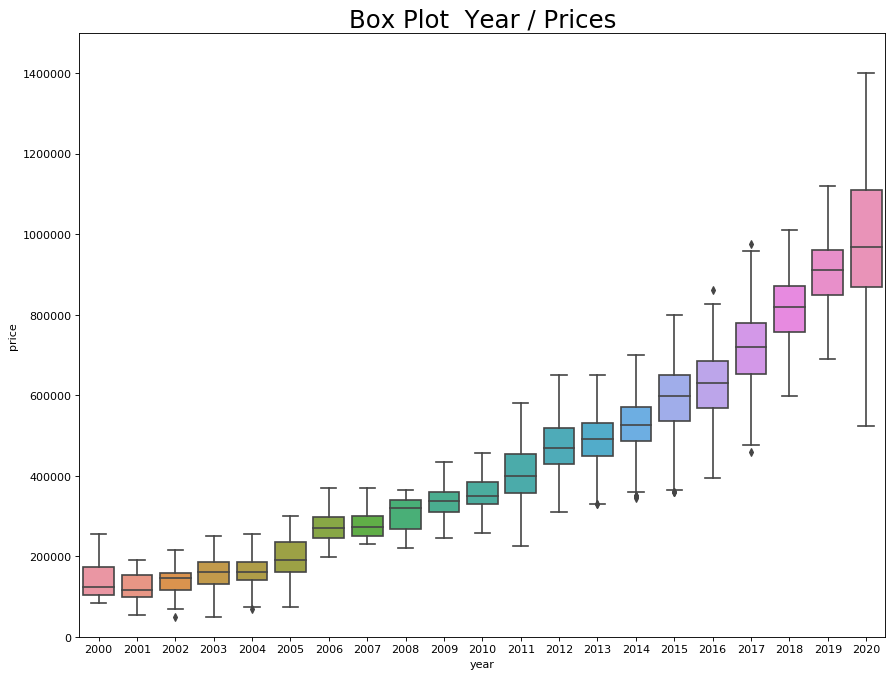

In [155]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [156]:
# еще раз удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

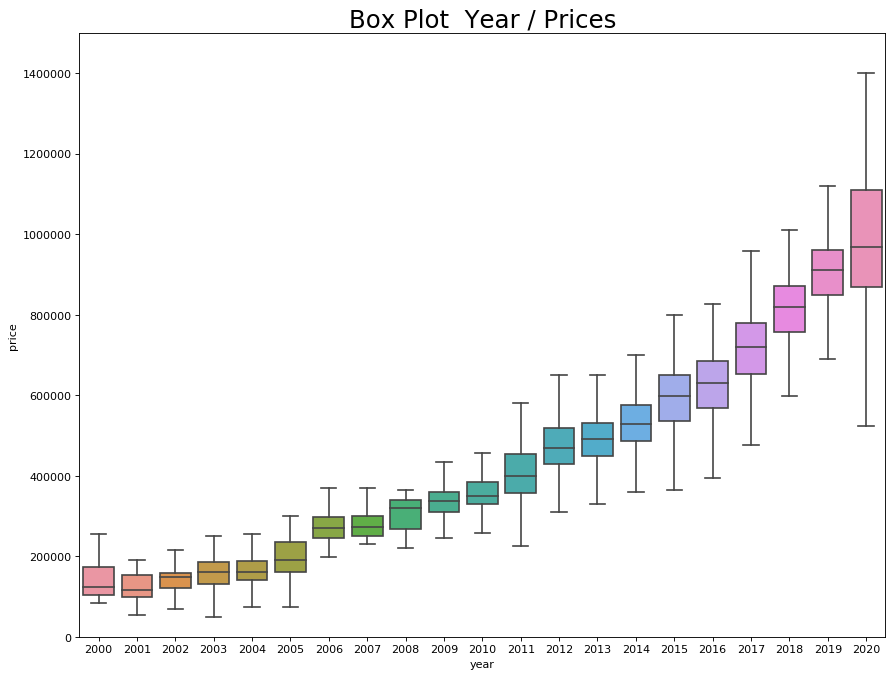

In [157]:
# Постоим Box Plot цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

#### Все выбросы удалились. Применим алгоритм CatBoost еще раз.

In [158]:
X = df.drop(['price'], axis=1)
y = df['price']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3, 4, 5, 6],
              'learning_rate' : [0.01, 0.03, 0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.2, 0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 4, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 188138.6382756	total: 6.26ms	remaining: 5s
1:	learn: 183640.2279820	total: 12.6ms	remaining: 5.03s
2:	learn: 179306.8407840	total: 17.3ms	remaining: 4.59s
3:	learn: 174951.8826347	total: 25.7ms	remaining: 5.11s
4:	learn: 170976.0211097	total: 31.9ms	remaining: 5.07s
5:	learn: 166927.1719497	total: 38.5ms	remaining: 5.1s
6:	learn: 162958.4046534	total: 43.9ms	remaining: 4.98s
7:	learn: 159134.3461008	total: 49.6ms	remaining: 4.91s
8:	learn: 155397.5058089	total: 53.9ms	remaining: 4.73s
9:	learn: 151722.9649254	total: 59.2ms	remaining: 4.68s
10:	learn: 148281.5438290	total: 64.5ms	remaining: 4.63s
11:	learn: 144994.0174481	total: 70.8ms	remaining: 4.65s
12:	learn: 141814.0153720	total: 76.2ms	remaining: 4.61s
13:	learn: 138582.2483508	total: 83ms	remaining: 4.66s
14:	learn: 135523.4738307	total: 89.2ms	remaining: 4.67s
15:	learn: 132664.9753605	total: 95.4ms	remaining: 4.67s
16:	learn: 129896.5670567	total: 102ms	remaining: 4.71s
17:	learn: 127133.0337631	total: 108ms	remaining

163:	learn: 52118.3505061	total: 860ms	remaining: 3.34s
164:	learn: 52081.4261944	total: 865ms	remaining: 3.33s
165:	learn: 52049.8416494	total: 872ms	remaining: 3.33s
166:	learn: 52036.5667444	total: 879ms	remaining: 3.33s
167:	learn: 52024.7535890	total: 882ms	remaining: 3.32s
168:	learn: 51985.0938268	total: 887ms	remaining: 3.31s
169:	learn: 51968.9497734	total: 892ms	remaining: 3.31s
170:	learn: 51946.5342694	total: 896ms	remaining: 3.29s
171:	learn: 51933.1582597	total: 899ms	remaining: 3.28s
172:	learn: 51917.9594460	total: 904ms	remaining: 3.27s
173:	learn: 51896.5902889	total: 909ms	remaining: 3.27s
174:	learn: 51886.3130316	total: 914ms	remaining: 3.27s
175:	learn: 51868.2262662	total: 918ms	remaining: 3.25s
176:	learn: 51844.6599127	total: 924ms	remaining: 3.25s
177:	learn: 51817.1166680	total: 926ms	remaining: 3.24s
178:	learn: 51797.7982137	total: 932ms	remaining: 3.23s
179:	learn: 51790.2294931	total: 935ms	remaining: 3.22s
180:	learn: 51770.1216736	total: 939ms	remaining

313:	learn: 50509.2128824	total: 1.54s	remaining: 2.39s
314:	learn: 50506.1531860	total: 1.54s	remaining: 2.38s
315:	learn: 50499.9147667	total: 1.55s	remaining: 2.37s
316:	learn: 50495.6471473	total: 1.55s	remaining: 2.36s
317:	learn: 50488.9209994	total: 1.56s	remaining: 2.36s
318:	learn: 50482.2564424	total: 1.56s	remaining: 2.36s
319:	learn: 50471.8023605	total: 1.57s	remaining: 2.35s
320:	learn: 50462.1496004	total: 1.57s	remaining: 2.35s
321:	learn: 50450.8659074	total: 1.58s	remaining: 2.34s
322:	learn: 50444.7138701	total: 1.58s	remaining: 2.34s
323:	learn: 50435.5123596	total: 1.59s	remaining: 2.33s
324:	learn: 50435.2321583	total: 1.59s	remaining: 2.32s
325:	learn: 50425.5385940	total: 1.59s	remaining: 2.32s
326:	learn: 50413.8906854	total: 1.6s	remaining: 2.31s
327:	learn: 50407.3210201	total: 1.6s	remaining: 2.31s
328:	learn: 50392.6005430	total: 1.61s	remaining: 2.3s
329:	learn: 50391.8040306	total: 1.61s	remaining: 2.29s
330:	learn: 50383.3561522	total: 1.61s	remaining: 2

488:	learn: 49544.8937386	total: 2.21s	remaining: 1.41s
489:	learn: 49541.2144622	total: 2.22s	remaining: 1.4s
490:	learn: 49537.6239828	total: 2.22s	remaining: 1.4s
491:	learn: 49531.2572328	total: 2.22s	remaining: 1.39s
492:	learn: 49525.2723186	total: 2.23s	remaining: 1.39s
493:	learn: 49520.5335680	total: 2.23s	remaining: 1.38s
494:	learn: 49517.0389528	total: 2.23s	remaining: 1.38s
495:	learn: 49510.3091726	total: 2.24s	remaining: 1.37s
496:	learn: 49501.5716161	total: 2.24s	remaining: 1.37s
497:	learn: 49493.1339400	total: 2.25s	remaining: 1.36s
498:	learn: 49485.6836011	total: 2.25s	remaining: 1.36s
499:	learn: 49479.1902888	total: 2.25s	remaining: 1.35s
500:	learn: 49469.6381975	total: 2.26s	remaining: 1.35s
501:	learn: 49462.0886950	total: 2.26s	remaining: 1.34s
502:	learn: 49459.6758376	total: 2.26s	remaining: 1.34s
503:	learn: 49452.0410900	total: 2.27s	remaining: 1.33s
504:	learn: 49444.8837294	total: 2.27s	remaining: 1.33s
505:	learn: 49438.6119198	total: 2.27s	remaining: 

668:	learn: 48721.3896138	total: 2.89s	remaining: 566ms
669:	learn: 48714.4783135	total: 2.9s	remaining: 563ms
670:	learn: 48708.0280603	total: 2.9s	remaining: 559ms
671:	learn: 48707.2341317	total: 2.91s	remaining: 554ms
672:	learn: 48704.5850957	total: 2.91s	remaining: 550ms
673:	learn: 48698.0031860	total: 2.92s	remaining: 546ms
674:	learn: 48694.8085594	total: 2.92s	remaining: 541ms
675:	learn: 48690.3918761	total: 2.92s	remaining: 537ms
676:	learn: 48689.6189928	total: 2.93s	remaining: 532ms
677:	learn: 48686.7081464	total: 2.93s	remaining: 528ms
678:	learn: 48682.4111487	total: 2.94s	remaining: 523ms
679:	learn: 48676.3046409	total: 2.94s	remaining: 519ms
680:	learn: 48675.3540489	total: 2.95s	remaining: 515ms
681:	learn: 48673.7449815	total: 2.95s	remaining: 510ms
682:	learn: 48672.8313843	total: 2.95s	remaining: 506ms
683:	learn: 48669.6953349	total: 2.95s	remaining: 501ms
684:	learn: 48665.5224236	total: 2.96s	remaining: 496ms
685:	learn: 48665.2589686	total: 2.96s	remaining: 

In [160]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=1,
                          depth=6)

In [161]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 188138.6382756	total: 9.34ms	remaining: 7.46s
1:	learn: 183640.2279820	total: 16.3ms	remaining: 6.52s
2:	learn: 179306.8407840	total: 25.1ms	remaining: 6.67s
3:	learn: 174951.8826347	total: 85.7ms	remaining: 17.1s
4:	learn: 170976.0211097	total: 91ms	remaining: 14.5s
5:	learn: 166927.1719497	total: 103ms	remaining: 13.6s
6:	learn: 162958.4046534	total: 129ms	remaining: 14.6s
7:	learn: 159134.3461008	total: 136ms	remaining: 13.5s
8:	learn: 155397.5058089	total: 143ms	remaining: 12.6s
9:	learn: 151722.9649254	total: 158ms	remaining: 12.5s
10:	learn: 148281.5438290	total: 165ms	remaining: 11.9s
11:	learn: 144994.0174481	total: 178ms	remaining: 11.7s
12:	learn: 141814.0153720	total: 183ms	remaining: 11.1s
13:	learn: 138582.2483508	total: 190ms	remaining: 10.7s
14:	learn: 135523.4738307	total: 197ms	remaining: 10.3s
15:	learn: 132664.9753605	total: 203ms	remaining: 9.93s
16:	learn: 129896.5670567	total: 209ms	remaining: 9.63s
17:	learn: 127133.0337631	total: 215ms	remaining: 9.34s

169:	learn: 51968.9497734	total: 1.27s	remaining: 4.73s
170:	learn: 51946.5342694	total: 1.28s	remaining: 4.71s
171:	learn: 51933.1582597	total: 1.28s	remaining: 4.68s
172:	learn: 51917.9594460	total: 1.29s	remaining: 4.67s
173:	learn: 51896.5902889	total: 1.3s	remaining: 4.68s
174:	learn: 51886.3130316	total: 1.32s	remaining: 4.7s
175:	learn: 51868.2262662	total: 1.32s	remaining: 4.68s
176:	learn: 51844.6599127	total: 1.33s	remaining: 4.67s
177:	learn: 51817.1166680	total: 1.33s	remaining: 4.64s
178:	learn: 51797.7982137	total: 1.33s	remaining: 4.63s
179:	learn: 51790.2294931	total: 1.34s	remaining: 4.6s
180:	learn: 51770.1216736	total: 1.34s	remaining: 4.58s
181:	learn: 51755.5974171	total: 1.34s	remaining: 4.56s
182:	learn: 51729.3224964	total: 1.35s	remaining: 4.55s
183:	learn: 51716.2239414	total: 1.36s	remaining: 4.54s
184:	learn: 51712.0314255	total: 1.36s	remaining: 4.52s
185:	learn: 51684.6946410	total: 1.36s	remaining: 4.5s
186:	learn: 51670.6653499	total: 1.37s	remaining: 4.

350:	learn: 50277.9999132	total: 2.32s	remaining: 2.97s
351:	learn: 50270.9122460	total: 2.33s	remaining: 2.96s
352:	learn: 50264.6212690	total: 2.35s	remaining: 2.98s
353:	learn: 50260.2029717	total: 2.36s	remaining: 2.97s
354:	learn: 50255.6435995	total: 2.36s	remaining: 2.96s
355:	learn: 50249.7290521	total: 2.37s	remaining: 2.95s
356:	learn: 50243.2612338	total: 2.37s	remaining: 2.94s
357:	learn: 50230.9727168	total: 2.38s	remaining: 2.94s
358:	learn: 50225.3457811	total: 2.38s	remaining: 2.93s
359:	learn: 50219.4238469	total: 2.39s	remaining: 2.92s
360:	learn: 50218.0379567	total: 2.39s	remaining: 2.91s
361:	learn: 50210.8545060	total: 2.4s	remaining: 2.9s
362:	learn: 50207.9612321	total: 2.4s	remaining: 2.89s
363:	learn: 50196.0096224	total: 2.41s	remaining: 2.88s
364:	learn: 50192.1175499	total: 2.41s	remaining: 2.88s
365:	learn: 50183.7879172	total: 2.42s	remaining: 2.87s
366:	learn: 50179.5111737	total: 2.42s	remaining: 2.86s
367:	learn: 50171.5462198	total: 2.42s	remaining: 2

510:	learn: 49406.8160865	total: 2.99s	remaining: 1.69s
511:	learn: 49402.0356041	total: 2.99s	remaining: 1.68s
512:	learn: 49399.5454710	total: 3s	remaining: 1.68s
513:	learn: 49394.8884772	total: 3s	remaining: 1.67s
514:	learn: 49390.0771219	total: 3.02s	remaining: 1.67s
515:	learn: 49385.5353176	total: 3.02s	remaining: 1.66s
516:	learn: 49382.3343233	total: 3.03s	remaining: 1.66s
517:	learn: 49374.6084240	total: 3.03s	remaining: 1.65s
518:	learn: 49370.3044150	total: 3.04s	remaining: 1.65s
519:	learn: 49364.9938802	total: 3.04s	remaining: 1.64s
520:	learn: 49361.8968085	total: 3.05s	remaining: 1.63s
521:	learn: 49353.8526194	total: 3.05s	remaining: 1.62s
522:	learn: 49347.7469617	total: 3.05s	remaining: 1.61s
523:	learn: 49345.7272565	total: 3.05s	remaining: 1.61s
524:	learn: 49341.3499484	total: 3.06s	remaining: 1.6s
525:	learn: 49336.9527365	total: 3.06s	remaining: 1.59s
526:	learn: 49331.8399709	total: 3.06s	remaining: 1.59s
527:	learn: 49327.6723151	total: 3.06s	remaining: 1.58s

687:	learn: 48654.5279821	total: 3.85s	remaining: 627ms
688:	learn: 48650.4672617	total: 3.85s	remaining: 621ms
689:	learn: 48649.4522767	total: 3.85s	remaining: 614ms
690:	learn: 48645.3976786	total: 3.87s	remaining: 610ms
691:	learn: 48644.6544833	total: 3.87s	remaining: 604ms
692:	learn: 48637.7690367	total: 3.88s	remaining: 598ms
693:	learn: 48633.5748788	total: 3.88s	remaining: 593ms
694:	learn: 48625.9761634	total: 3.88s	remaining: 587ms
695:	learn: 48622.0272332	total: 3.88s	remaining: 581ms
696:	learn: 48616.9376136	total: 3.89s	remaining: 575ms
697:	learn: 48611.3387582	total: 3.9s	remaining: 569ms
698:	learn: 48607.9567380	total: 3.9s	remaining: 564ms
699:	learn: 48600.6968950	total: 3.91s	remaining: 558ms
700:	learn: 48595.3868198	total: 3.91s	remaining: 553ms
701:	learn: 48591.0120470	total: 3.92s	remaining: 547ms
702:	learn: 48588.1512361	total: 3.93s	remaining: 542ms
703:	learn: 48581.5605814	total: 3.93s	remaining: 536ms
704:	learn: 48577.7881444	total: 3.94s	remaining: 

In [162]:
# Предсказываем цену на тестовом наборе

preds = model.predict(X_test)

In [163]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 53783.079431


###### Ошибка уменьшилась на 5085 руб (была 58868.688960), модель без выбросов существенно точнее

In [165]:
# сохраним полученные данные в файл .csv

df.to_csv('C:\\Users\\user1174\\Downloads\\AutoRU_project\\df.csv')

### посмотрим для интереса стоимость моего автомобиля

In [166]:
# создадим фрейм с параметрами автомобиля

my_df = pd.DataFrame({'model': ['Kia Rio III Рестайлинг'], 'year': [2015], 'km_age': [68000],
                      'body_type': ['седан'], 'engine_power': [123],
                     'transmission': ['автоматическая'], 'owners_count': ['1 владелец']})

In [167]:
my_df

,model,year,km_age,body_type,engine_power,transmission,owners_count
0,Kia Rio III Рестайлинг,2015,68000,седан,123,автоматическая,1 владелец


In [168]:
# Получаем предсказание

my_preds = model.predict(my_df)

In [169]:
my_preds

array([671785.86559848])

### итак, мы получили цену 671785.87 рублей.
### для сравнения нашего предсказания обратимся к сайту robasta.ru, где за 99 рублей можно получить цену на авто

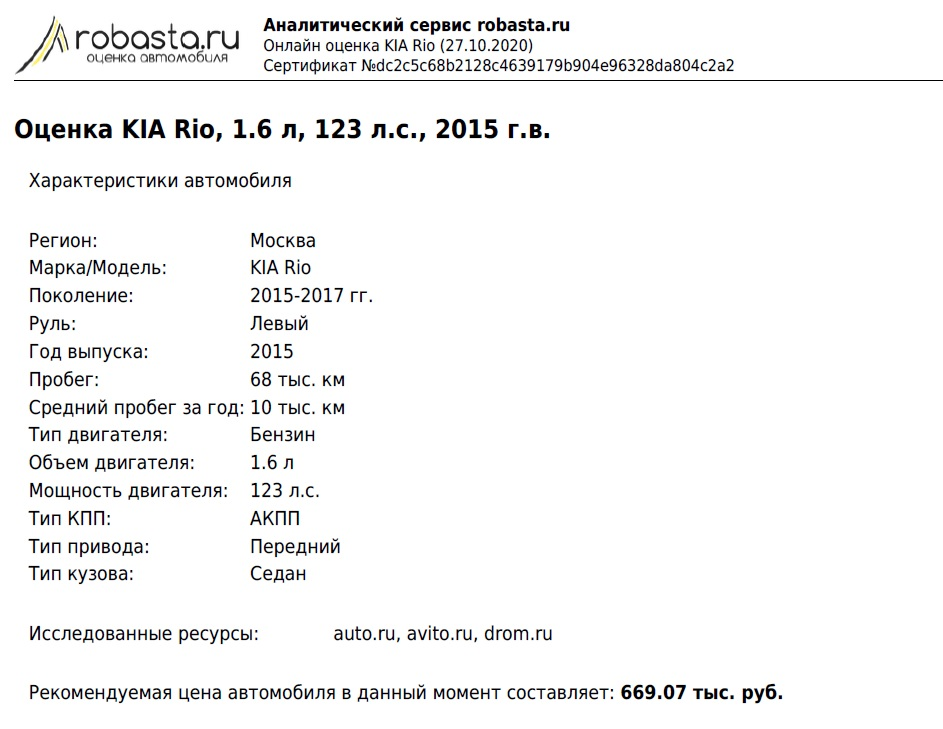

In [170]:
# Вот отчет с этого сайта

from IPython.display import Image
Image('C:\\Users\\user1174\\Downloads\\AutoRU_project\\robasta_kia.jpg')

#### Мы получили хороший результат!

## Применим к нашей задаче несколько других алгоритмов

In [171]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,695000
4,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,410000
5,Kia Rio III,2012,159995,седан,123,автоматическая,1 владелец,445000


####### В нашем фрейме присутствуют категориальные данные (колонки 'model', 'body_type', 'transmission', 'owners_count').
Алгоритм CatBoost позволял нам работать с такими данными без преобразований, просто нужно было указать на эти столбцы, как на категориальные. Для других алгоритмов регрессии, которые мы будем применять ниже, необходимо произвести one-hot кодирование данных признаков.

In [172]:
for i in ['model', 'body_type', 'transmission', 'owners_count']:
    one_hot = pd.get_dummies(df[i])
    df = df.drop(i, axis = 1)
    df = df.join(one_hot)

In [173]:
df.head()

,year,km_age,engine_power,price,Kia Rio I,Kia Rio I Рестайлинг,Kia Rio II,Kia Rio II Рестайлинг,Kia Rio III,Kia Rio III Рестайлинг,...,Kia Rio IV X-Line,Kia Rio IV Рестайлинг,седан,универсал 5 дв.,хэтчбек 5 дв.,автоматическая,механическая,1 владелец,2 владельца,3 или более
0,2017,57000,123,770000,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,2016,19086,123,709000,0,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
2,2017,105860,123,695000,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
4,2013,115000,107,410000,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
5,2012,159995,123,445000,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [174]:
# Назначаем X и y

X = df.drop(['price'], axis=1)
y = df['price']

## Алгоритм XGBoost

In [175]:
# Подберем параметры регрессора, используя поиск по сетке с кроссвалидацией

In [176]:
import xgboost as xgb
from sklearn import preprocessing
from xgboost.sklearn import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [0.02, 0.03, 0.05],
              'max_depth': [2, 3, 4],
              'min_child_weight': [4, 5, 6, 8],
              'silent': [1],
              'subsample': [0.3, 0.5, 0.6],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 800]}

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 4, n_jobs = -1, verbose=True)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.3min finished


0.924028188718519
{'colsample_bytree': 0.7, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.5}


In [177]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [178]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          nthread = 4,
                          silent = 1,
                          min_child_weight = 6,
                          colsample_bytree = 0.7,
                          subsample = 0.5,
                          learning_rate = 0.02,
                          max_depth = 4,  
                          n_estimators = 500)

In [179]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.5, verbosity=1)

In [180]:
# Делаем предсказание на тестовом наборе

preds = xg_reg.predict(X_test)

In [181]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 52461.062263


In [182]:
params = {'objective':'reg:linear',
          'nthread': 4,
          'silent' : 1,
          'min_child_weight' : 6,
          'colsample_bytree' : 0.7,
          'subsample' : 0.5,
          'learning_rate' : 0.02,
          'max_depth' : 4,  
          'n_estimators' : 500,
          'alpha': 10}

In [183]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

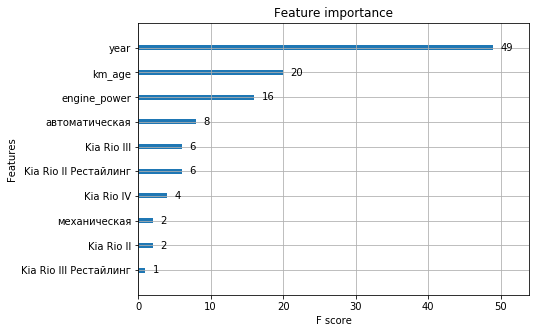

In [184]:
# Влияние признаков на модель

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]

In [185]:
# создадим фрейм с параметрами моего автомобиля

my_df = pd.DataFrame({'year': [2015],
                      'km_age': [68000],
                      'engine_power': [123],       
                      'Kia Rio I': [0],
                      'Kia Rio I Рестайлинг': [0],
                      'Kia Rio II': [0],
                      'Kia Rio II Рестайлинг': [0], 
                      'Kia Rio III': [0], 
                      'Kia Rio III Рестайлинг': [1],
                      'Kia Rio IV': [0], 
                      'Kia Rio IV X-Line': [0],
                      'Kia Rio IV Рестайлинг': [0],
                      'седан': [1],
                      'универсал 5 дв.': [0],
                      'хэтчбек 5 дв.': [0],
                      'автоматическая': [1],
                      'механическая': [0],
                      '1 владелец': [1],
                      '2 владельца': [0],
                      '3 или более': [0]
                        })

In [186]:
my_df

,year,km_age,engine_power,Kia Rio I,Kia Rio I Рестайлинг,Kia Rio II,Kia Rio II Рестайлинг,Kia Rio III,Kia Rio III Рестайлинг,Kia Rio IV,Kia Rio IV X-Line,Kia Rio IV Рестайлинг,седан,универсал 5 дв.,хэтчбек 5 дв.,автоматическая,механическая,1 владелец,2 владельца,3 или более
0,2015,68000,123,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0


In [187]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          nthread = 4,
                          silent = 1,
                          min_child_weight = 6,
                          colsample_bytree = 0.7,
                          subsample = 0.5,
                          learning_rate = 0.02,
                          max_depth = 4,  
                          n_estimators = 500)

In [188]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=4, min_child_weight=6, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.5, verbosity=1)

In [189]:
# Получаем предсказание

my_preds = xg_reg.predict(my_df)

In [190]:
my_preds

array([677992.25], dtype=float32)

## Алгоритм RandomForest

In [191]:
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110, 120],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed: 12.9min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [192]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [193]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [194]:
# Предсказываем на тестовом наборе

preds = rf.predict(X_test)

In [195]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 53507.505888


In [196]:
# Получаем предсказание

my_preds = rf.predict(my_df)

In [197]:
my_preds

array([669679.40153524])

## Линейная регрессия (LinearRegression)

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv = 4)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

[0.91550017 0.90956524 0.90748467 0.9048246 ] 0.9093436730379303 0.00393158733048767


In [199]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
# Предсказываем на тестовом наборе

preds = lm.predict(X_test)

In [201]:
# Вычисляем ошибку

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 58057.610931


In [202]:
# Получаем предсказание

my_preds = lm.predict(my_df)

In [203]:
my_preds

array([668359.69426204])

### RMSE различных алгоритмов

In [204]:
# CatBoost             RMSE: 53783.079431
# XGBoost              RMSE: 52461.062263
# RandomForest         RMSE: 53507.505888
# Linear Regression    RMSE: 58057.610931

#### минимальная ошибка получилась у алгоритма XGBoost, расхождения между RMSE трех первых алгоритмов
#### CatBoost, XGBoost, RandomForest не существенные, можно использовать для предсказания любой из них